In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [120]:
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)
cf.go_offline()
pio.renderers.default = 'iframe_connected'

In [121]:
data = pd.read_csv(r"phase_3_data/steam_games_extracted_phase_2.csv")

In [122]:
##################################################################################################################
##################################################################################################################
##################################################################################################################

In [123]:
# # # $ # # # # # #                           Quick recheckin on the data

In [124]:
data.isnull().sum()

app_id                    0
game_title                0
release_date              0
win                       0
mac                       0
linux                     0
steam_ranking             0
positive_ratio            0
num_of_user_reviews       0
final_price               0
original_price            0
discount                  0
steam_deck                0
num_of_played_hours       0
num_of_recommendations    0
price_difference          0
game_age                  0
platforms_count           0
recommendation_ratio      0
date_release              0
dtype: int64

In [125]:
print(data.info() , data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app_id                  39211 non-null  int64  
 1   game_title              39211 non-null  object 
 2   release_date            39211 non-null  object 
 3   win                     39211 non-null  bool   
 4   mac                     39211 non-null  bool   
 5   linux                   39211 non-null  bool   
 6   steam_ranking           39211 non-null  object 
 7   positive_ratio          39211 non-null  int64  
 8   num_of_user_reviews     39211 non-null  int64  
 9   final_price             39211 non-null  float64
 10  original_price          39211 non-null  float64
 11  discount                39211 non-null  int64  
 12  steam_deck              39211 non-null  bool   
 13  num_of_played_hours     39211 non-null  float64
 14  num_of_recommendations  39211 non-null

In [126]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [127]:
data.sample(5)

app_id                 game_title release_date   win    mac  linux  \
31262   379380                   ReLoaded   2015-07-27  True  False  False   
7280    675030      Super Samurai Rampage   2017-08-01  True  False  False   
24528   987210  Crossroads  Lucky Edition   2019-03-20  True   True  False   
27308   601130                      Spark   2017-11-10  True   True  False   
38764  2414730  Elf of Era  Idols Project   2023-06-22  True  False  False   

         steam_ranking  positive_ratio  num_of_user_reviews  final_price  \
31262            Mixed              50                   14         4.99   
7280          Positive              88                   34         1.99   
24528  Mostly Positive              78                   47         0.00   
27308         Positive              82                   17         0.00   
38764    Very Positive             100                   82         0.00   

       original_price  discount  steam_deck  num_of_played_hours  \
31262            4.99         0        True                  3.8   
7280             1.99         0        True                 35.5   
24528            0.00         0        True                484.8   
27308            0.00         0        True                 62.4   
38764            0.00         0        True                  0.0   

       num_of_recommendations  price_difference  game_age  platforms_count  \
31262                       4               0.0         9                1   
7280                       20               0.0         7                1   
24528                      18               0.0         5                2   
27308                       6               0.0         7                2   
38764                       0               0.0         1                1   

       recommendation_ratio date_release  
31262                  28.6   2015-07-27  
7280                   58.8   2017-08-01  
24528                  38.3   2019-03-20  
27308                  35.3   2017-11-10  
38764                   0.0   2023-06-22

In [128]:
##################################################################################################################
##################################################################################################################
##################################################################################################################

In [129]:
# Feature Relationships and Correlation

In [130]:
plt.style.use("dark_background")

In [131]:
num_data = data.select_dtypes(exclude=["bool" , "object"])

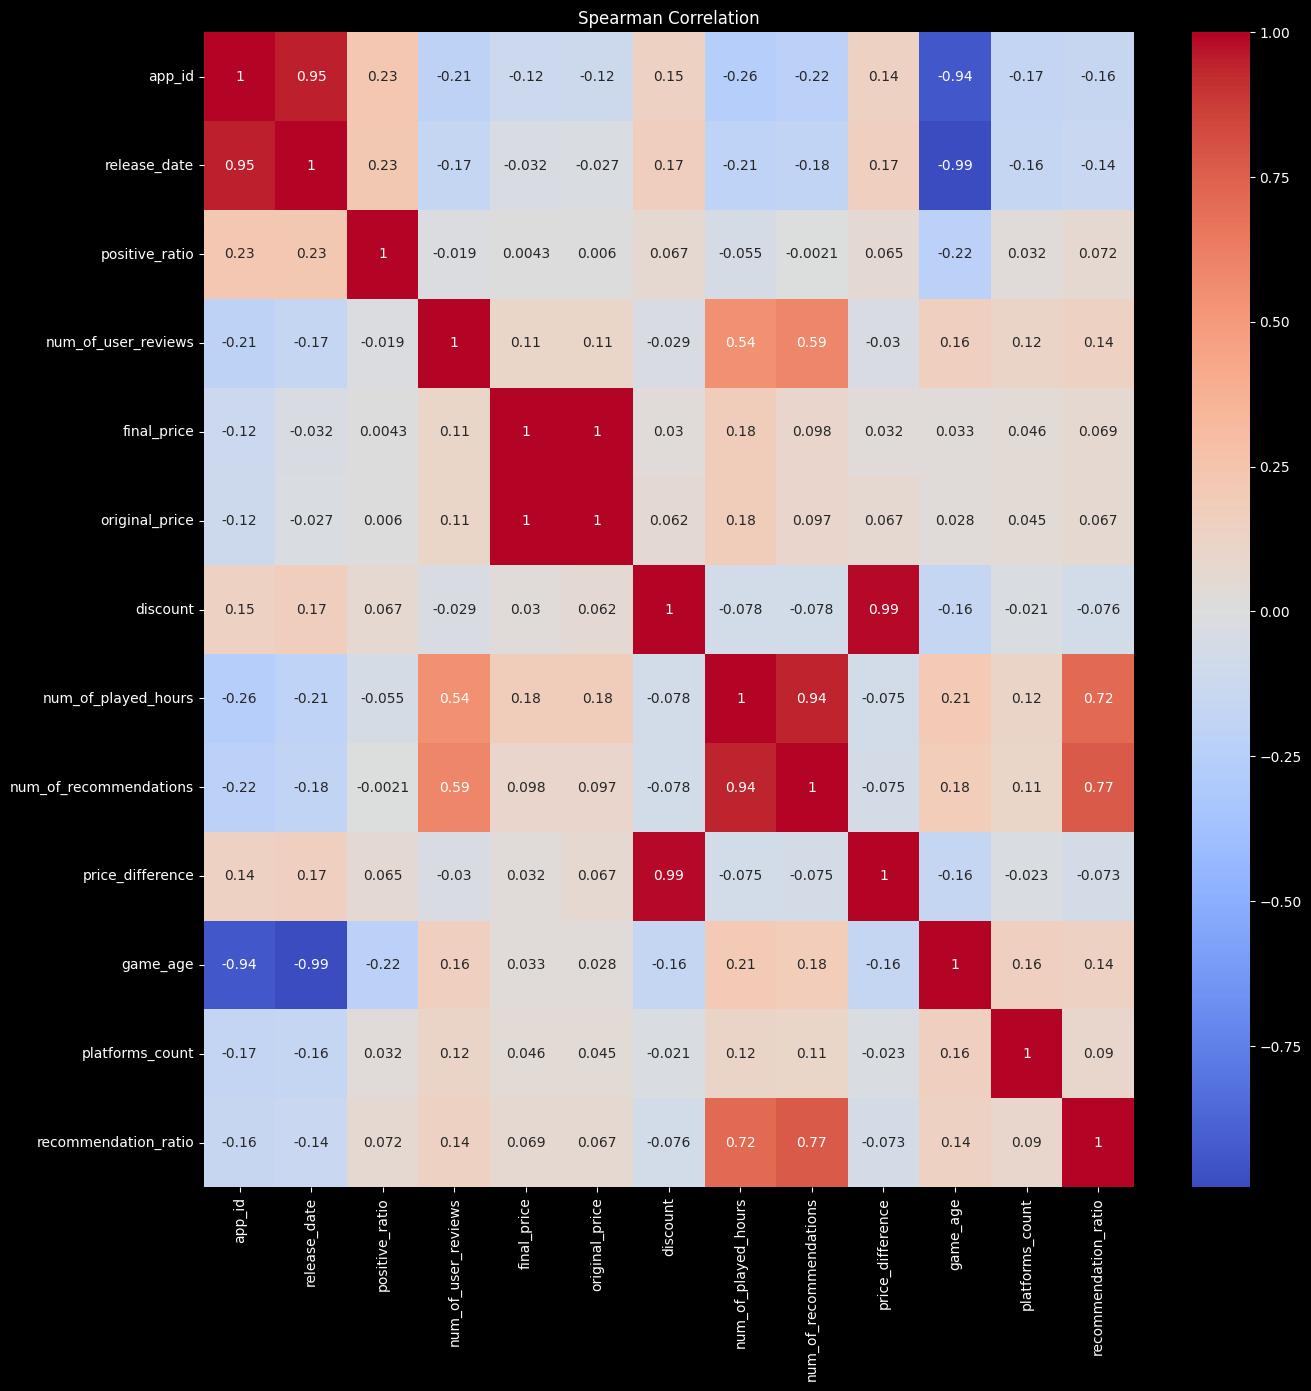

In [132]:
spearman_corr = num_data.corr(method = "spearman")

plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr , annot=True, cmap='coolwarm')

plt.title("Spearman Correlation")

plt.show()

In [133]:
# Strong positive correlations:
#     Original price and final price: This shows a very strong positive correlation,
#                                     indicating that the original price of a game is a major determinant of its final price.

#   - Number of played hours and number of recommendations: This indicates that games played for longer durations 
#                                                           tend to receive more recommendations.

#   - Discount and price difference: This strong correlation makes sense, 
#                                    as a higher discount leads to a larger difference between the original and final price.

# --------------------------------------------------------------------------------------------------

# Strong negative correlations:
#    - Game age and number of played hours: This shows that older games tend to be played less.

# --------------------------------------------------------------------------------------------------

# Other noteworthy correlations:
#    - Number of user reviews and number of recommendations: This shows a moderate positive correlation,
#                                indicating that games with more user reviews also tend to receive more recommendations.

# --------------------------------------------------------------------------------------------------

# Overall :
#        this heatmap provides a valuable overview of the relationships between various game attributes.
#        It highlights the key factors that influence things like price, recommendations, and playtime.

In [134]:
#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

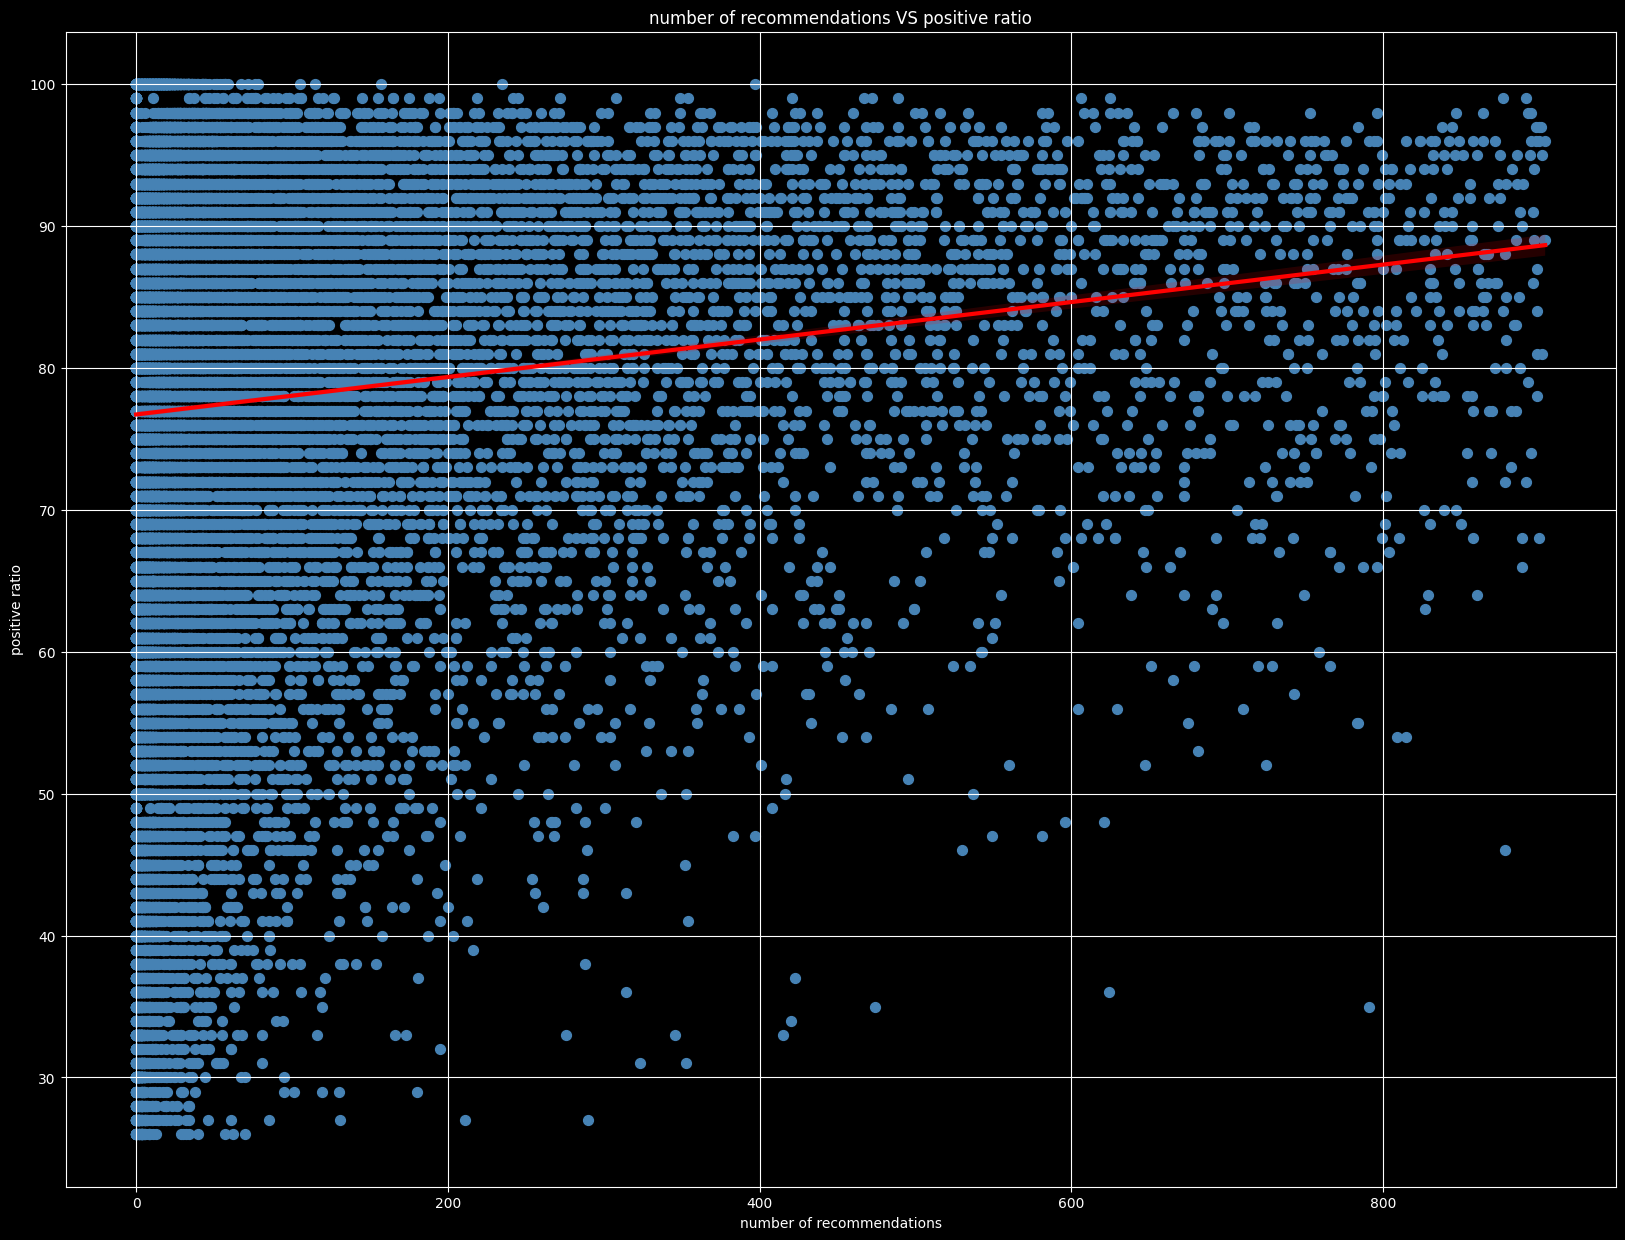

In [135]:
# The relation between the number of recommendations and the positive ratio

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_recommendations" ,
            y="positive_ratio" ,
            data = data ,
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#4682B4"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number of recommendations VS positive ratio")
plt.xlabel("number of recommendations")
plt.ylabel("positive ratio")

plt.grid()
plt.show()


# The plot shows a weak positive correlation between the number of recommendations and the positive ratio of video games. 
# This means that as the number of recommendations increases, the positive ratio tends to increase slightly. 
# However, the relationship is not very strong.

# It's interesting to note that even games with a low number of recommendations can still have a high positive ratio .
# means that  the number of recommnedations is not the only parameter that effects on the positive ratio.

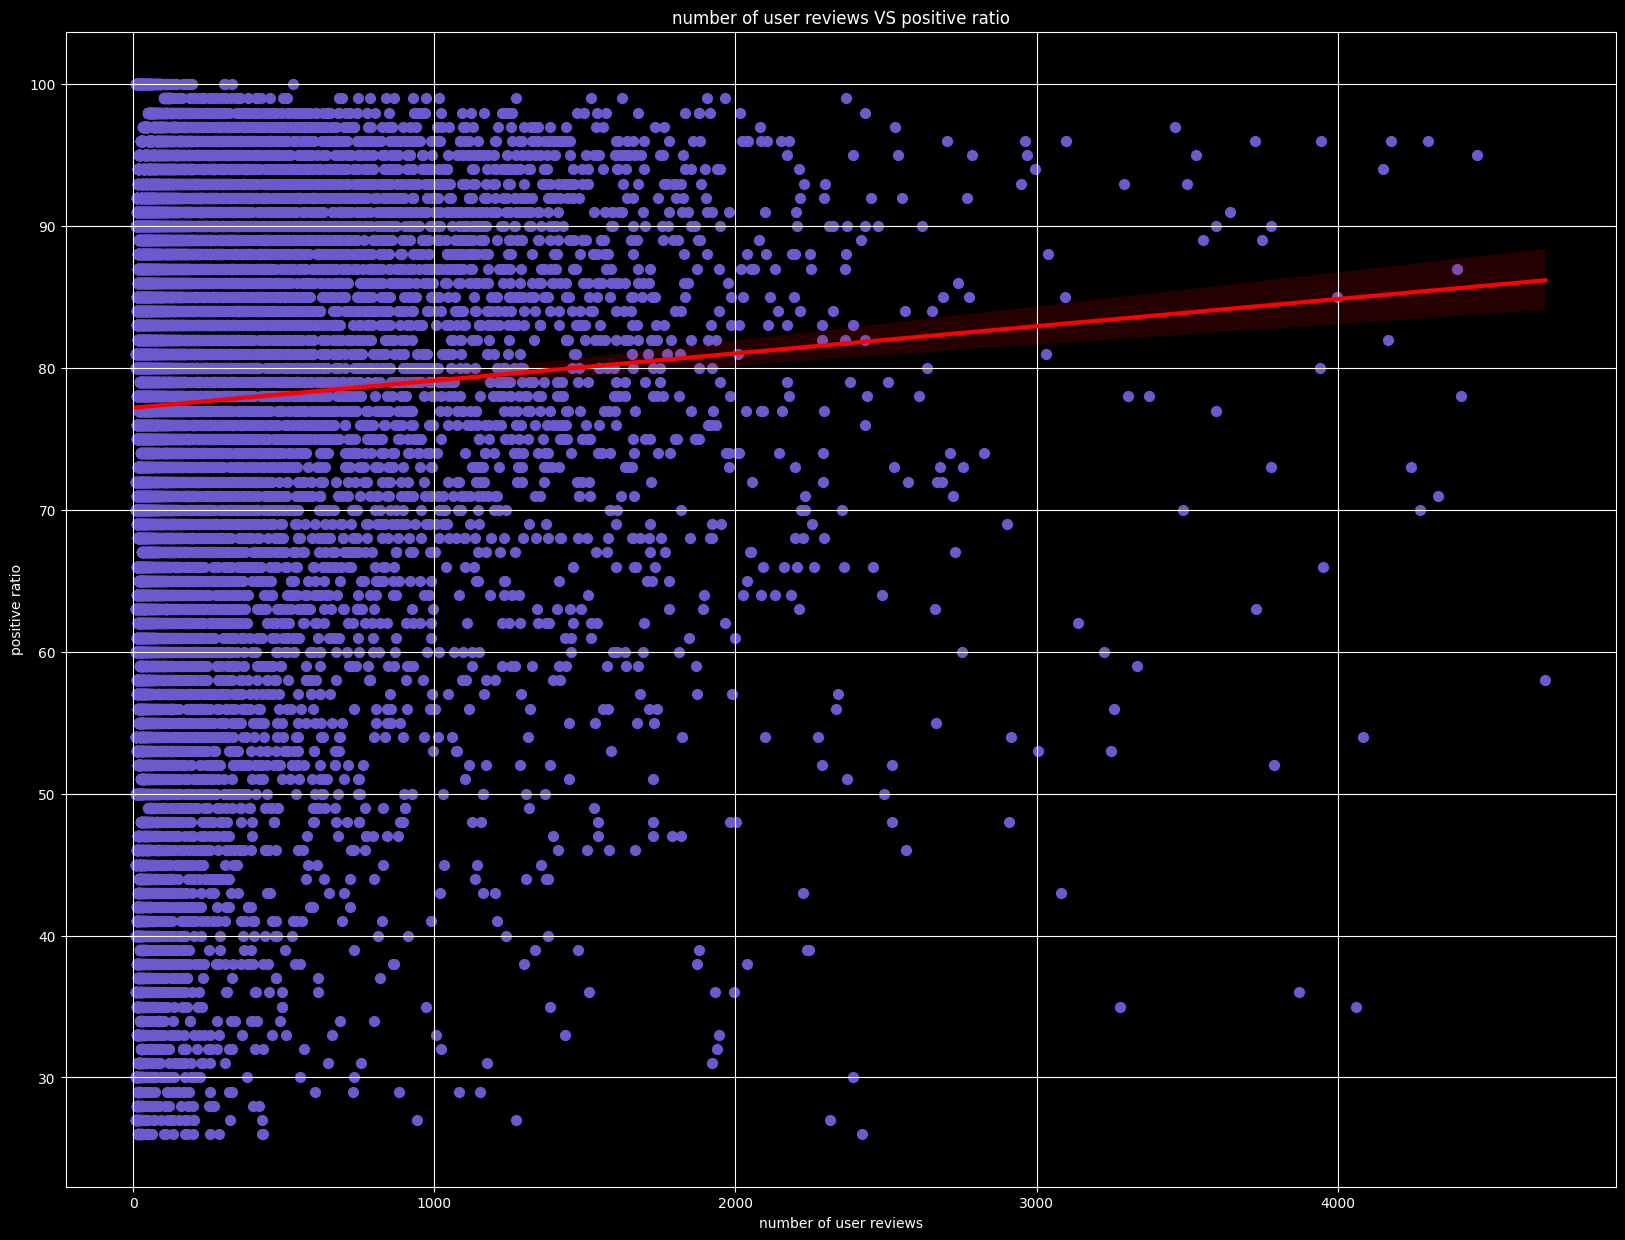

In [136]:
#  The relation between the number of users reviews and the positive ratio and the positive ratio

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_user_reviews" ,
            y="positive_ratio" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#6A5ACD"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number of user reviews VS positive ratio")
plt.xlabel("number of user reviews")
plt.ylabel("positive ratio")

plt.grid()
plt.show()


# The scatter plot shows a very weak positive correlation between the number of user reviews and the positive ratio of video games.
# This means that as the number of user reviews increases, the positive ratio tends to increase slightly, 
# but the relationship is not very strong

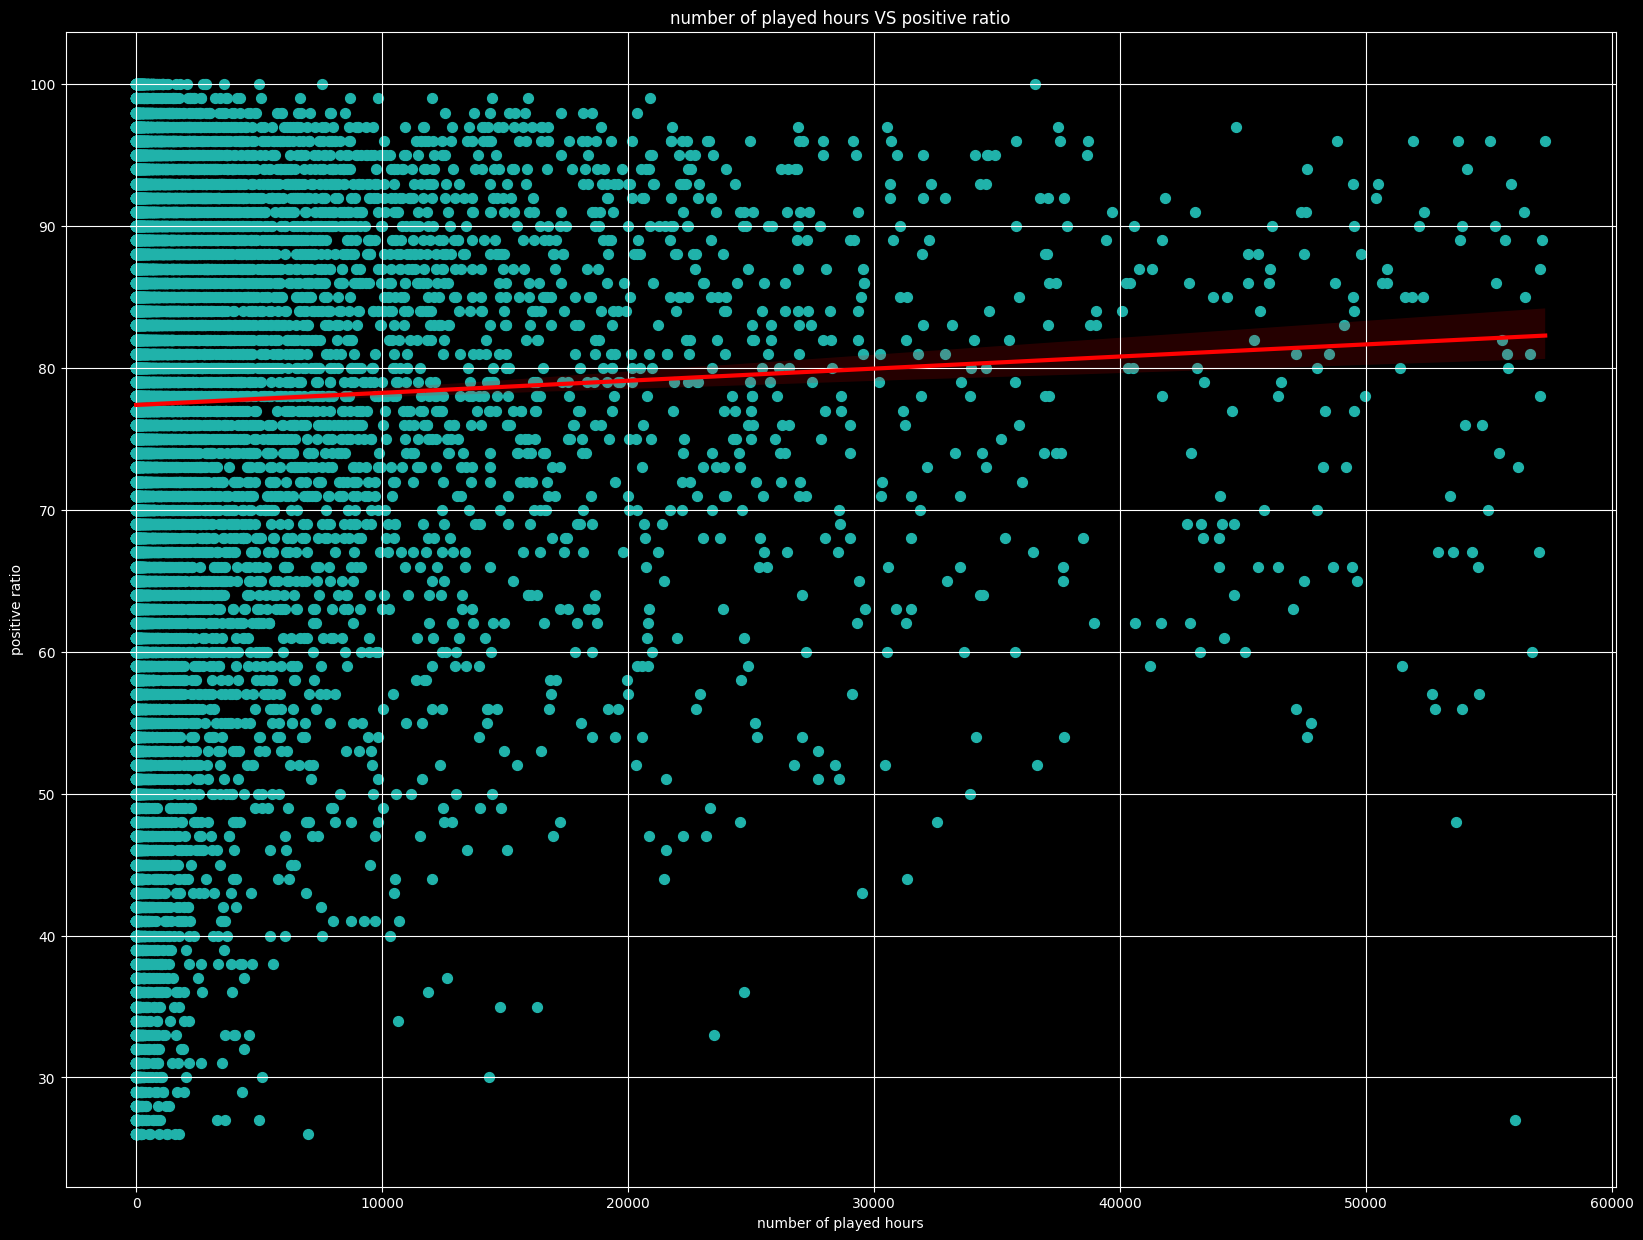

In [137]:
#  The relation between the number of played hours and the positive ratio and the positive ratio

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_played_hours" ,
            y="positive_ratio" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#20B2AA"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number of played hours VS positive ratio")
plt.xlabel("number of played hours")
plt.ylabel("positive ratio")

plt.grid()
plt.show()

# The plot shows a weak positive correlation between the number of played hours and the positive ratio of video games.
# This means that as the number of played hours increases, 
# the positive ratio tends to increase slightly, but the relationship is not very strong.

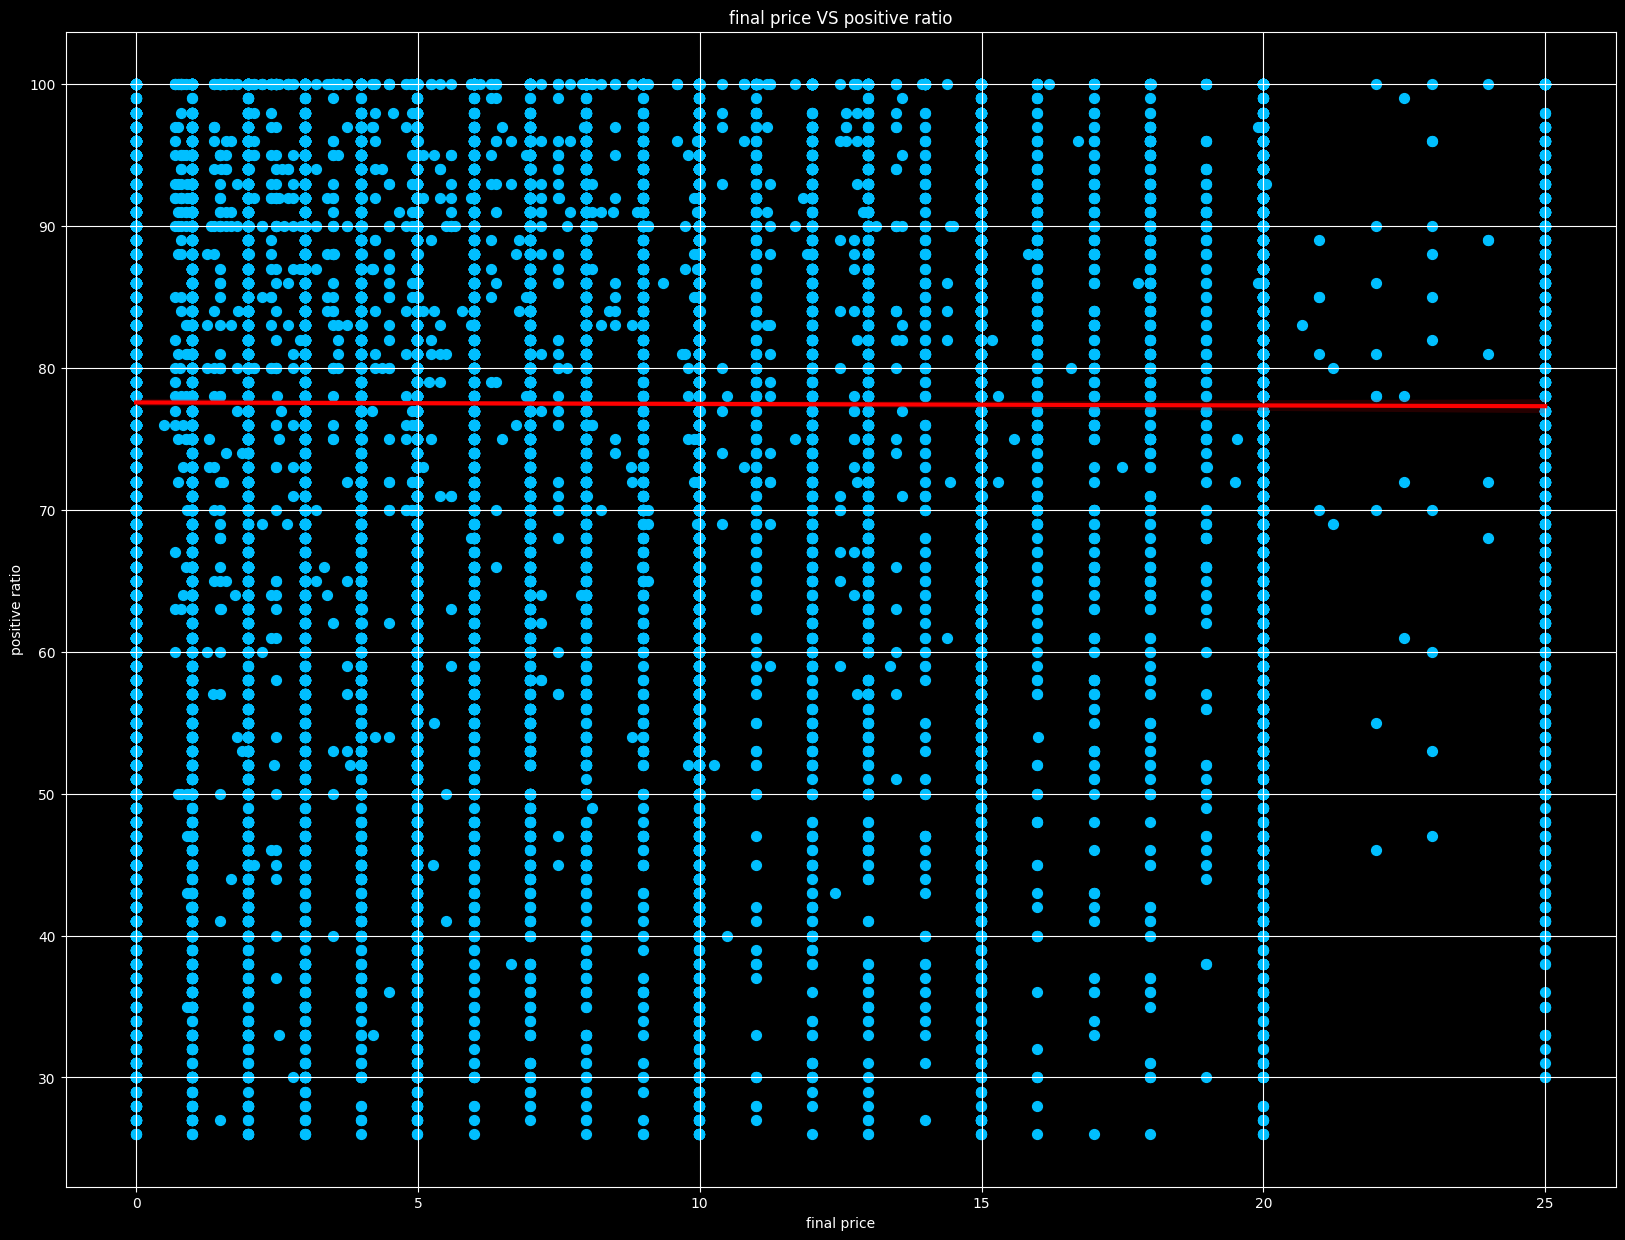

In [138]:
# The relation between the final price and the positive ration
plt.figure(figsize=(20,15))
sns.regplot(x="final_price" ,
            y="positive_ratio" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#00BFFF"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("final price VS positive ratio")
plt.xlabel("final price")
plt.ylabel("positive ratio")

plt.grid()
plt.show()

# The plot shows no clear correlation between the final price and the positive ratio of video games. 
# The data points are spread out with no discernible pattern. 

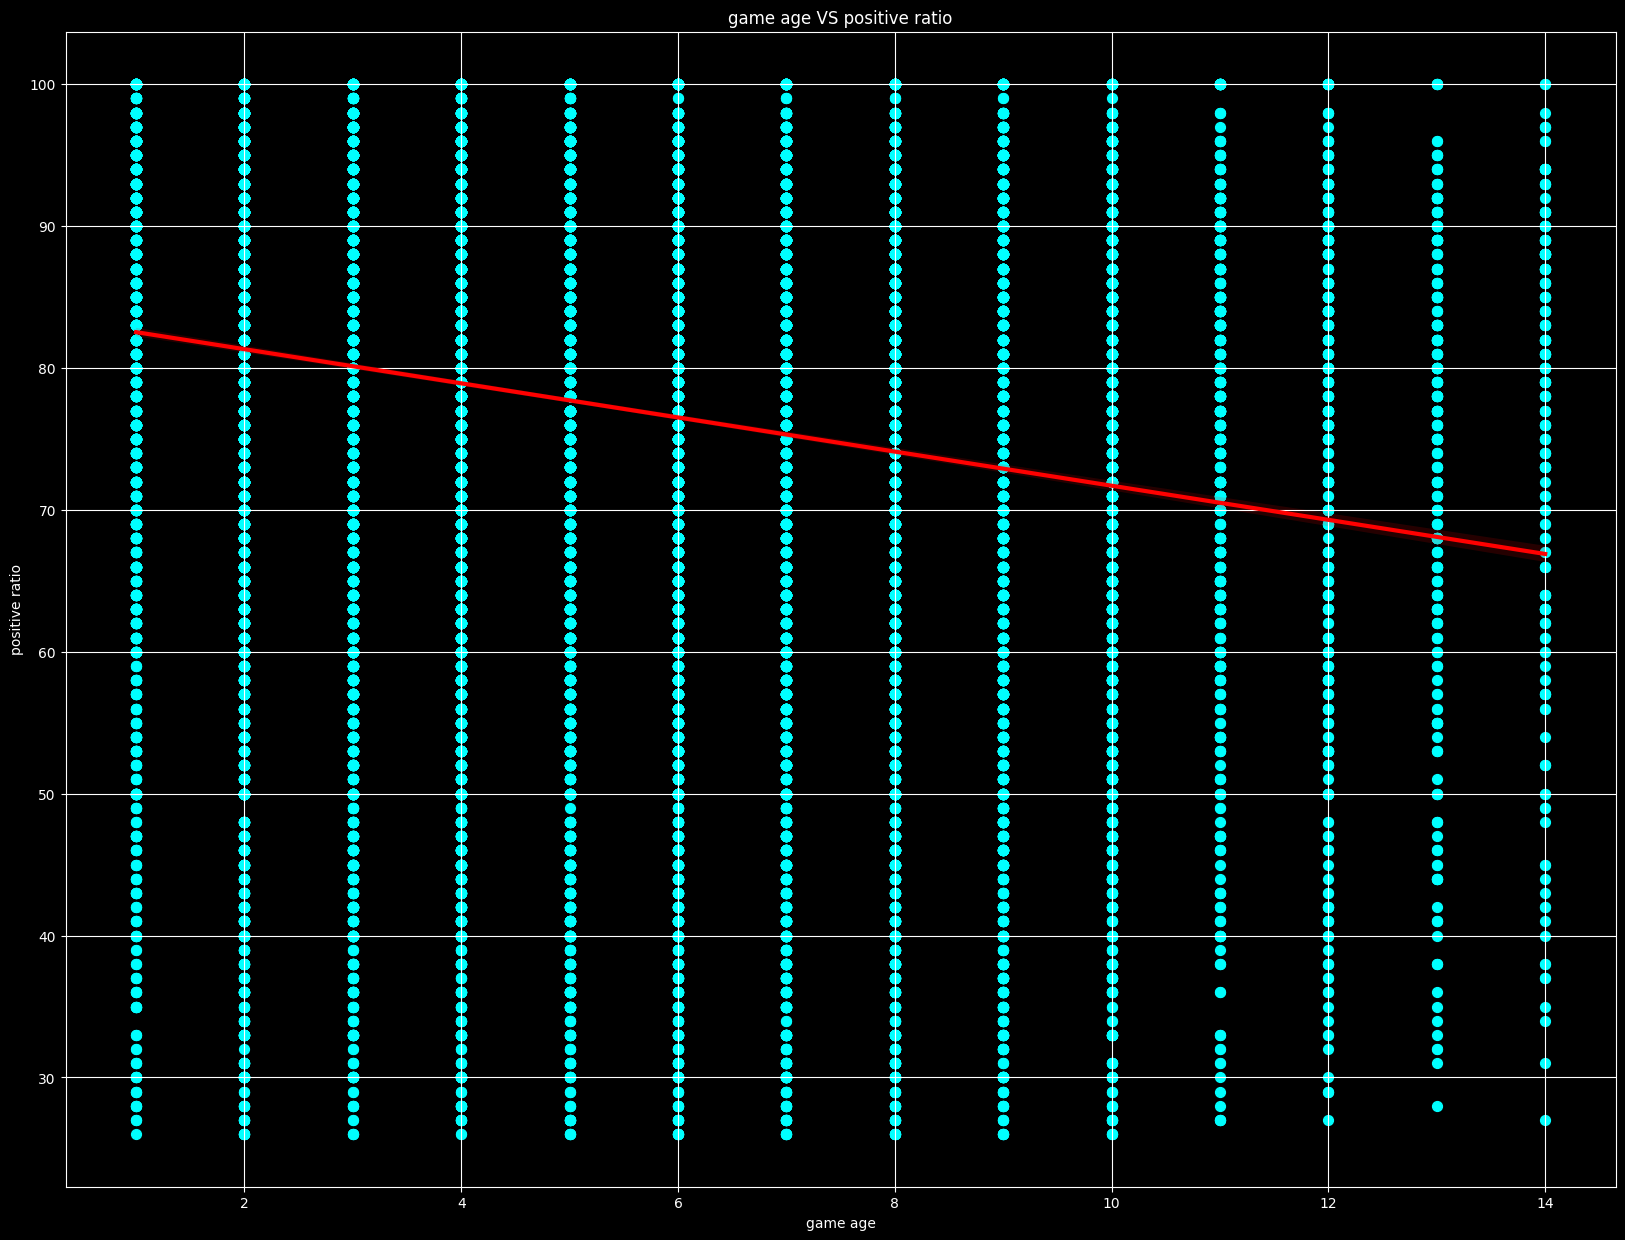

In [139]:
# The relation between the game age and the positive ratio

plt.figure(figsize=(20,15))
sns.regplot(x="game_age" ,
            y="positive_ratio" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#00FFFF"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("game age VS positive ratio")
plt.xlabel("game age")
plt.ylabel("positive ratio")

plt.grid()
plt.show()

# The plot shows no clear correlation between the final price and the positive ratio of video games. 
# The data points are spread out with no discernible pattern. 

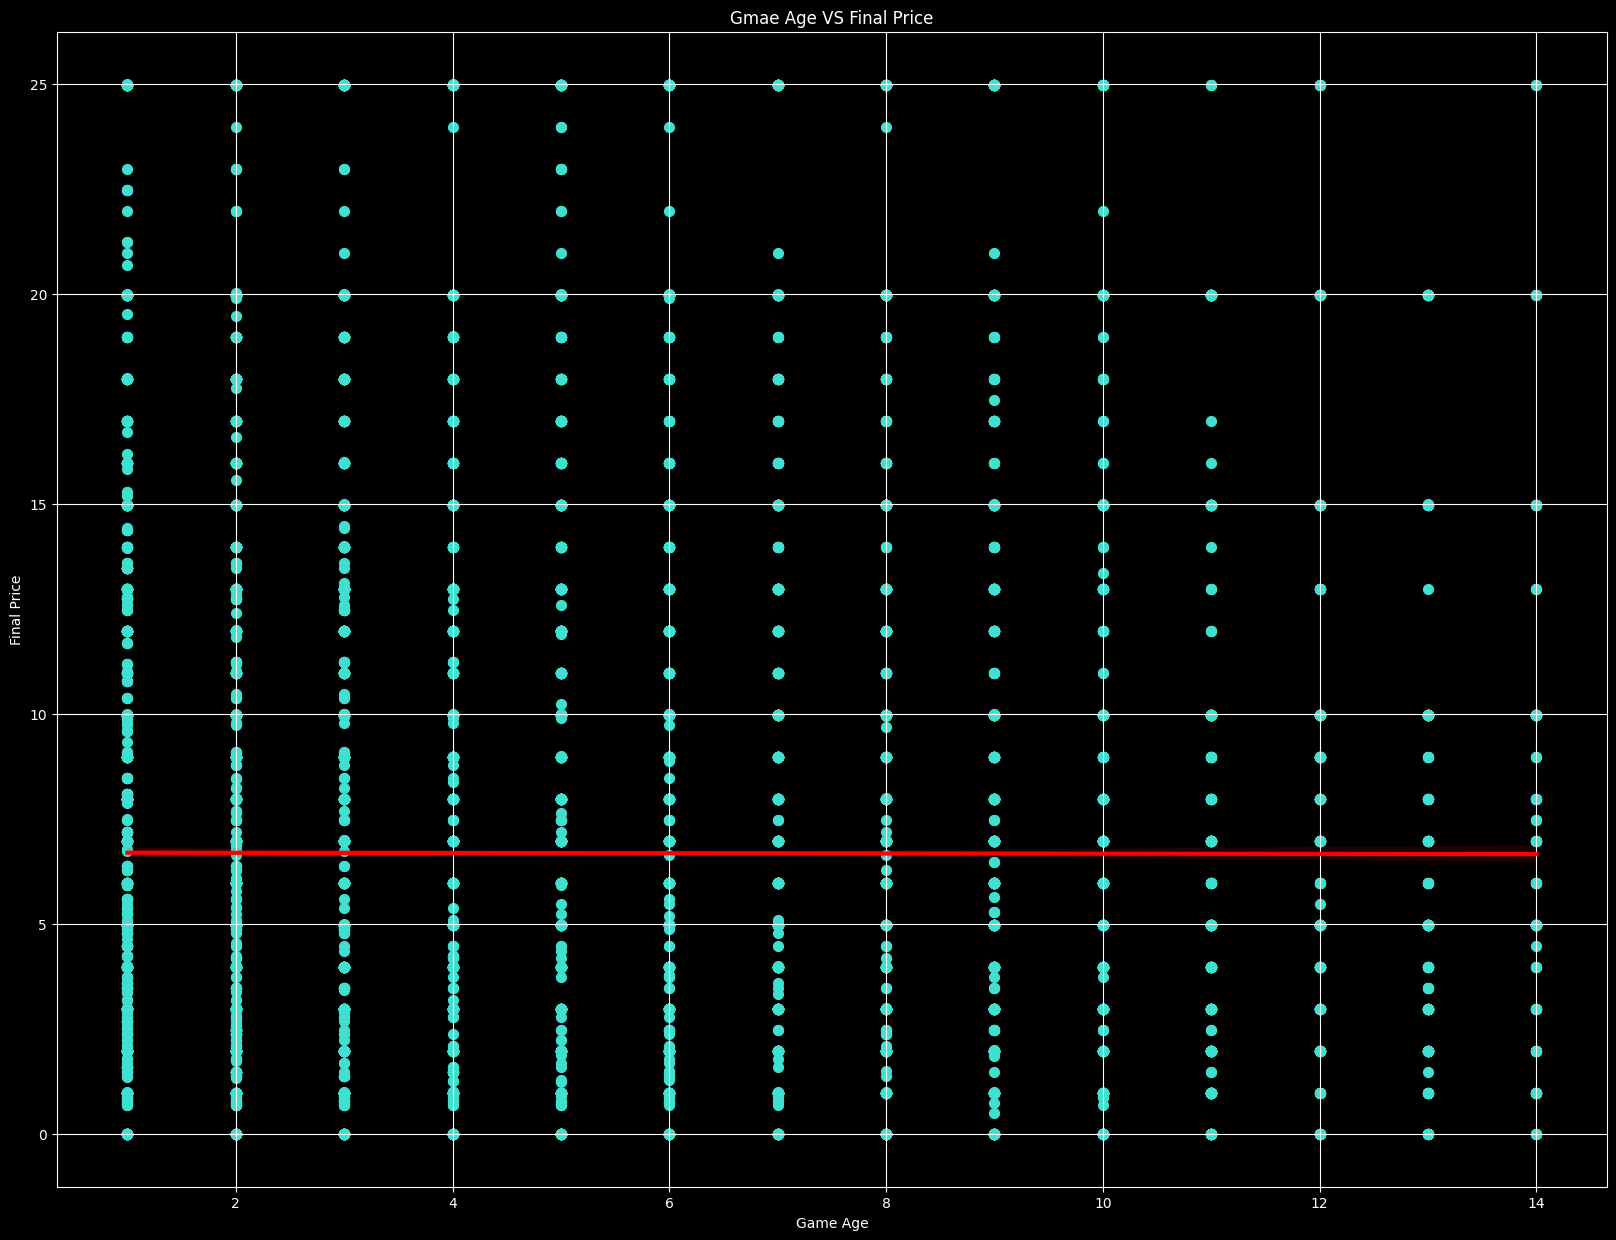

In [140]:
#  The relation between the game age  and the final price .

plt.figure(figsize=(20,15))
sns.regplot(x="game_age" ,
            y="final_price" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#40E0D0"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("Gmae Age VS Final Price")
plt.xlabel("Game Age")
plt.ylabel("Final Price")

plt.grid()
plt.show()

# The scatter plot shows no clear correlation between the game age and the final price of video games. 
# The data points are spread out with no discernible pattern.


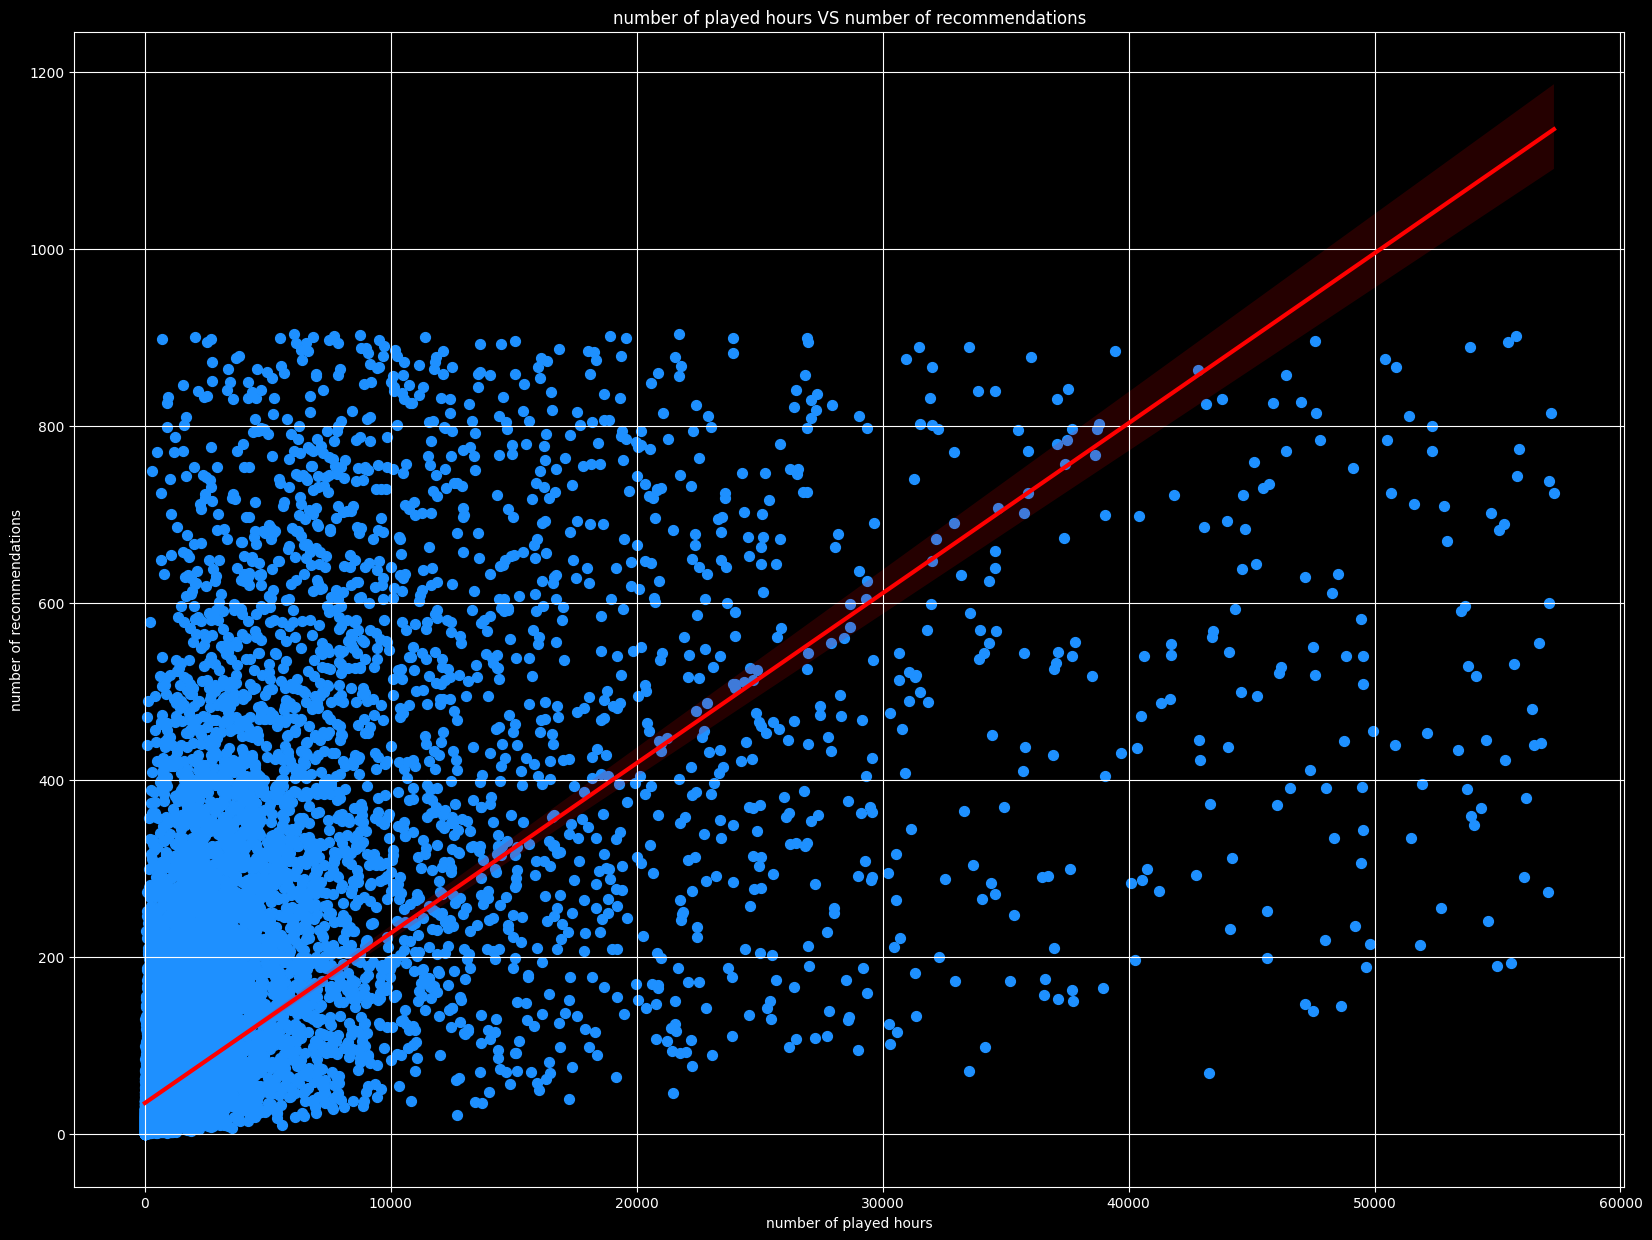

In [141]:
# The relation between the number of played hours  and the number of recommendations .

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_played_hours" ,
            y="num_of_recommendations" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#1E90FF"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number of played hours VS number of recommendations")
plt.xlabel("number of played hours")
plt.ylabel("number of recommendations")

plt.grid()
plt.show()

# The plot shows a strong positive correlation between the number of played hours and the number of user recommendations for video games.
# This means that as the number of played hours increases, the number of user recommendations tends to increase significantly.


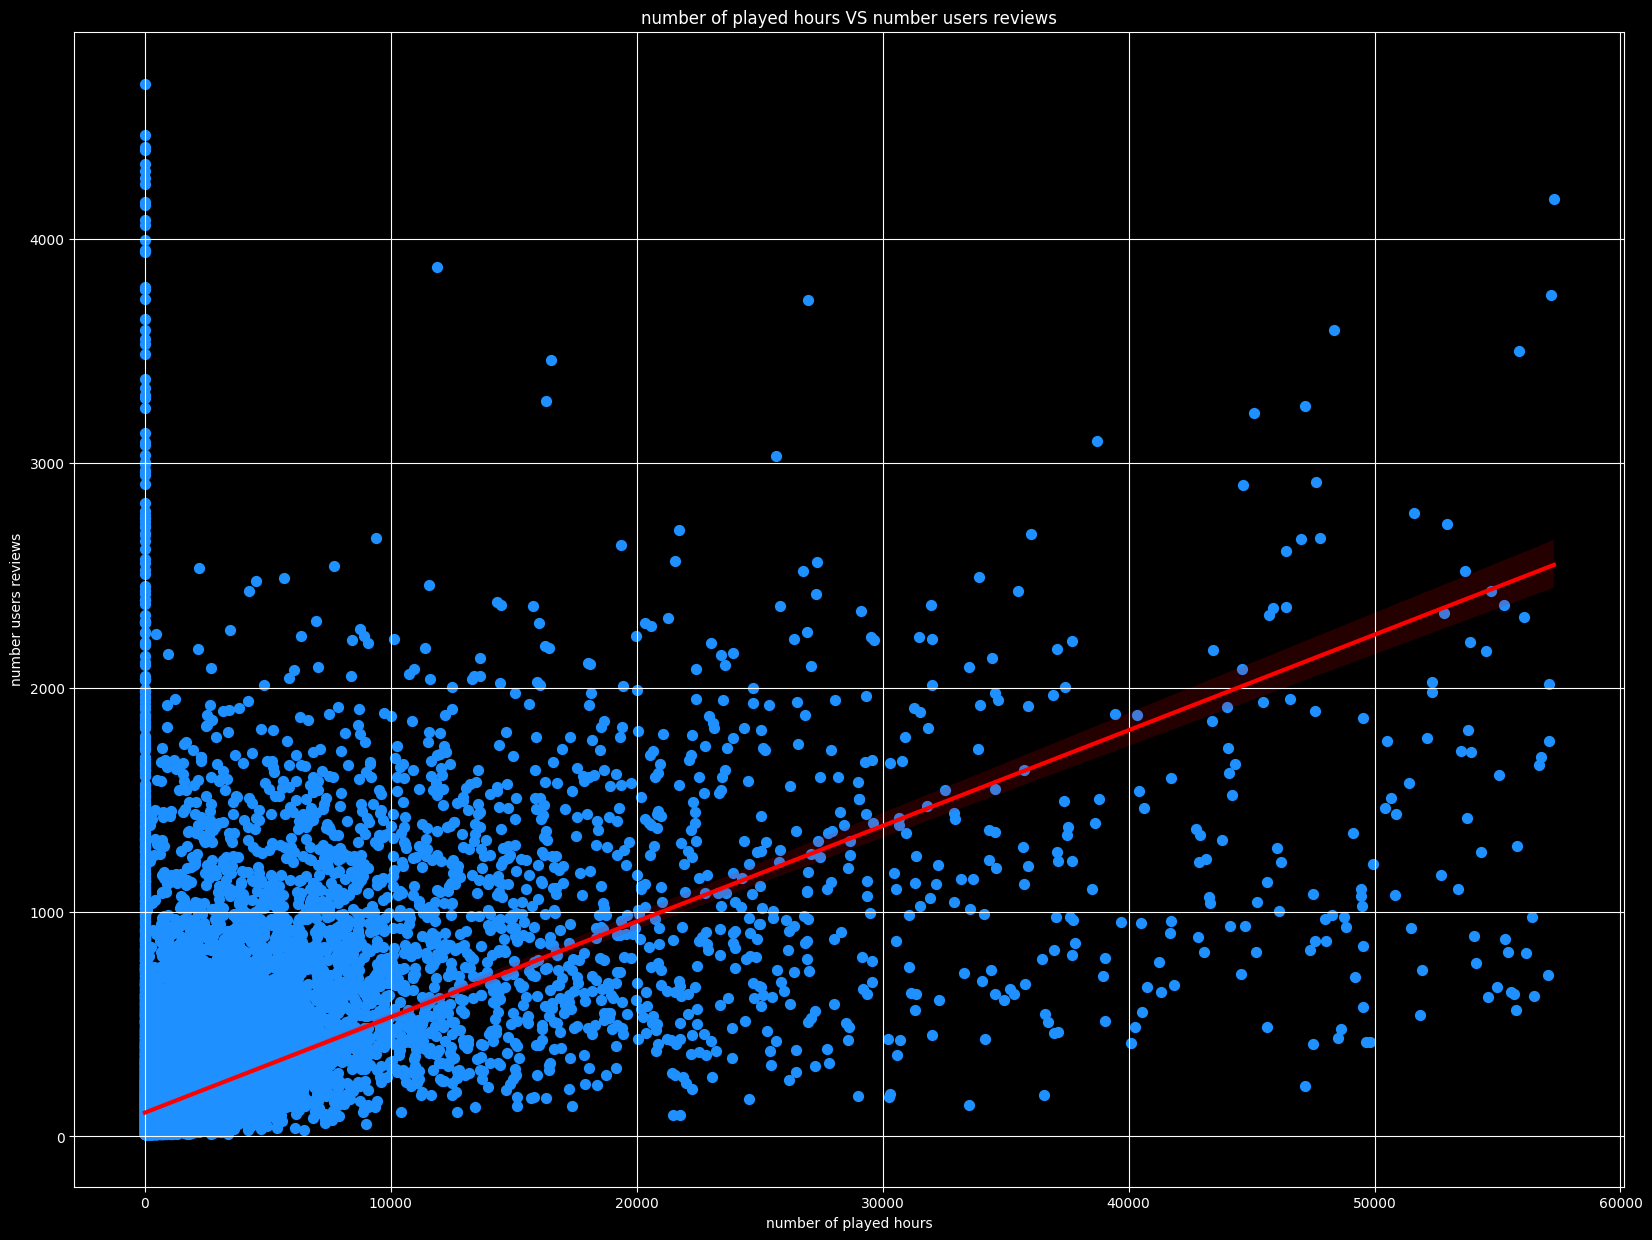

In [142]:
# The relation between the number of played hours and the number users reviews .

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_played_hours" ,
            y="num_of_user_reviews" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#1E90FF"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number of played hours VS number users reviews")
plt.xlabel("number of played hours")
plt.ylabel("number users reviews")

plt.grid()
plt.show()

# The plot shows a weak positive correlation between the number of played hours and the number of user reviews for video games. 
# This means that as the number of played hours increases, the number of user reviews tends to increase slightly.
# However, the relationship is not very strong. 

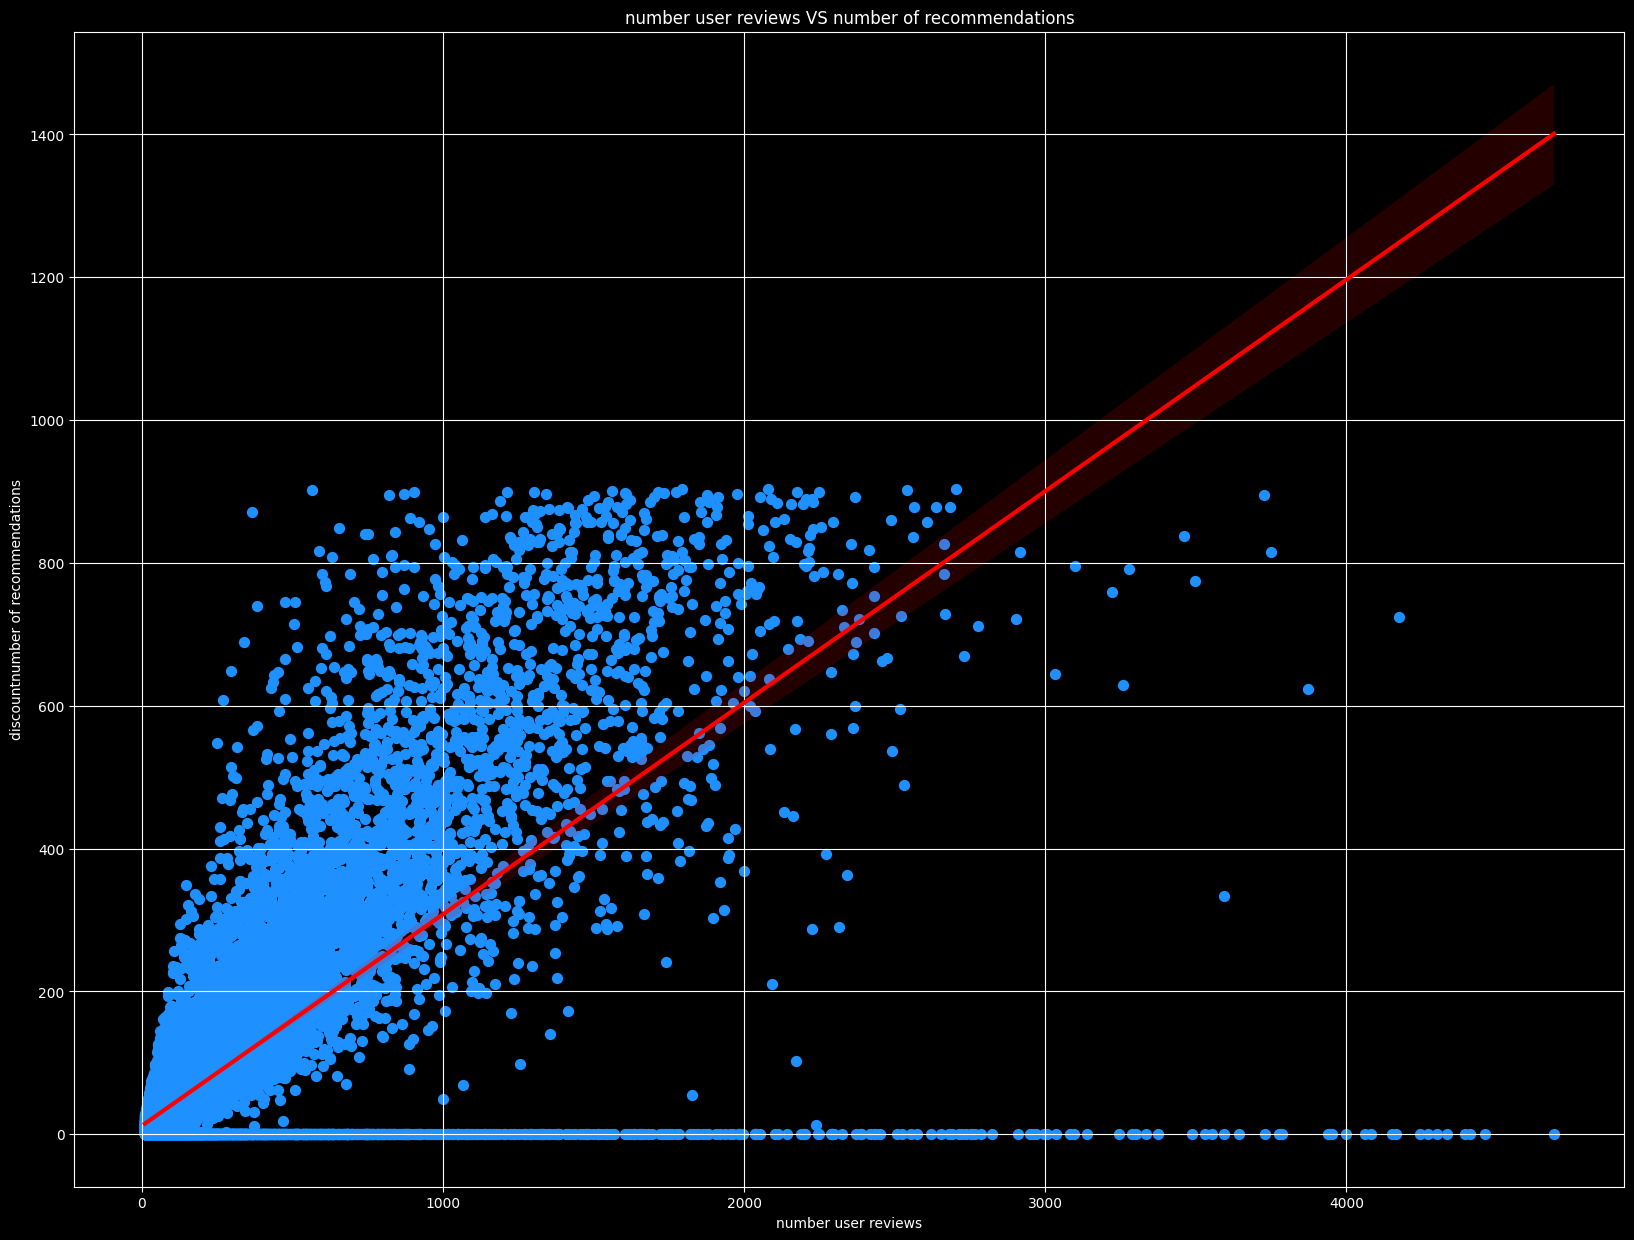

In [143]:
# The relation between the number user reviews and the number of recommendations .

plt.figure(figsize=(20,15))
sns.regplot(x="num_of_user_reviews" ,
            y="num_of_recommendations" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#1E90FF"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("number user reviews VS number of recommendations")
plt.xlabel("number user reviews")
plt.ylabel("discountnumber of recommendations")

plt.grid()
plt.show()

# The plot shows a strong positive correlation between the number of user reviews and the number of recommendations for video games.
#This means that as the number of user reviews increases, the number of recommendations tends to increase significantly.

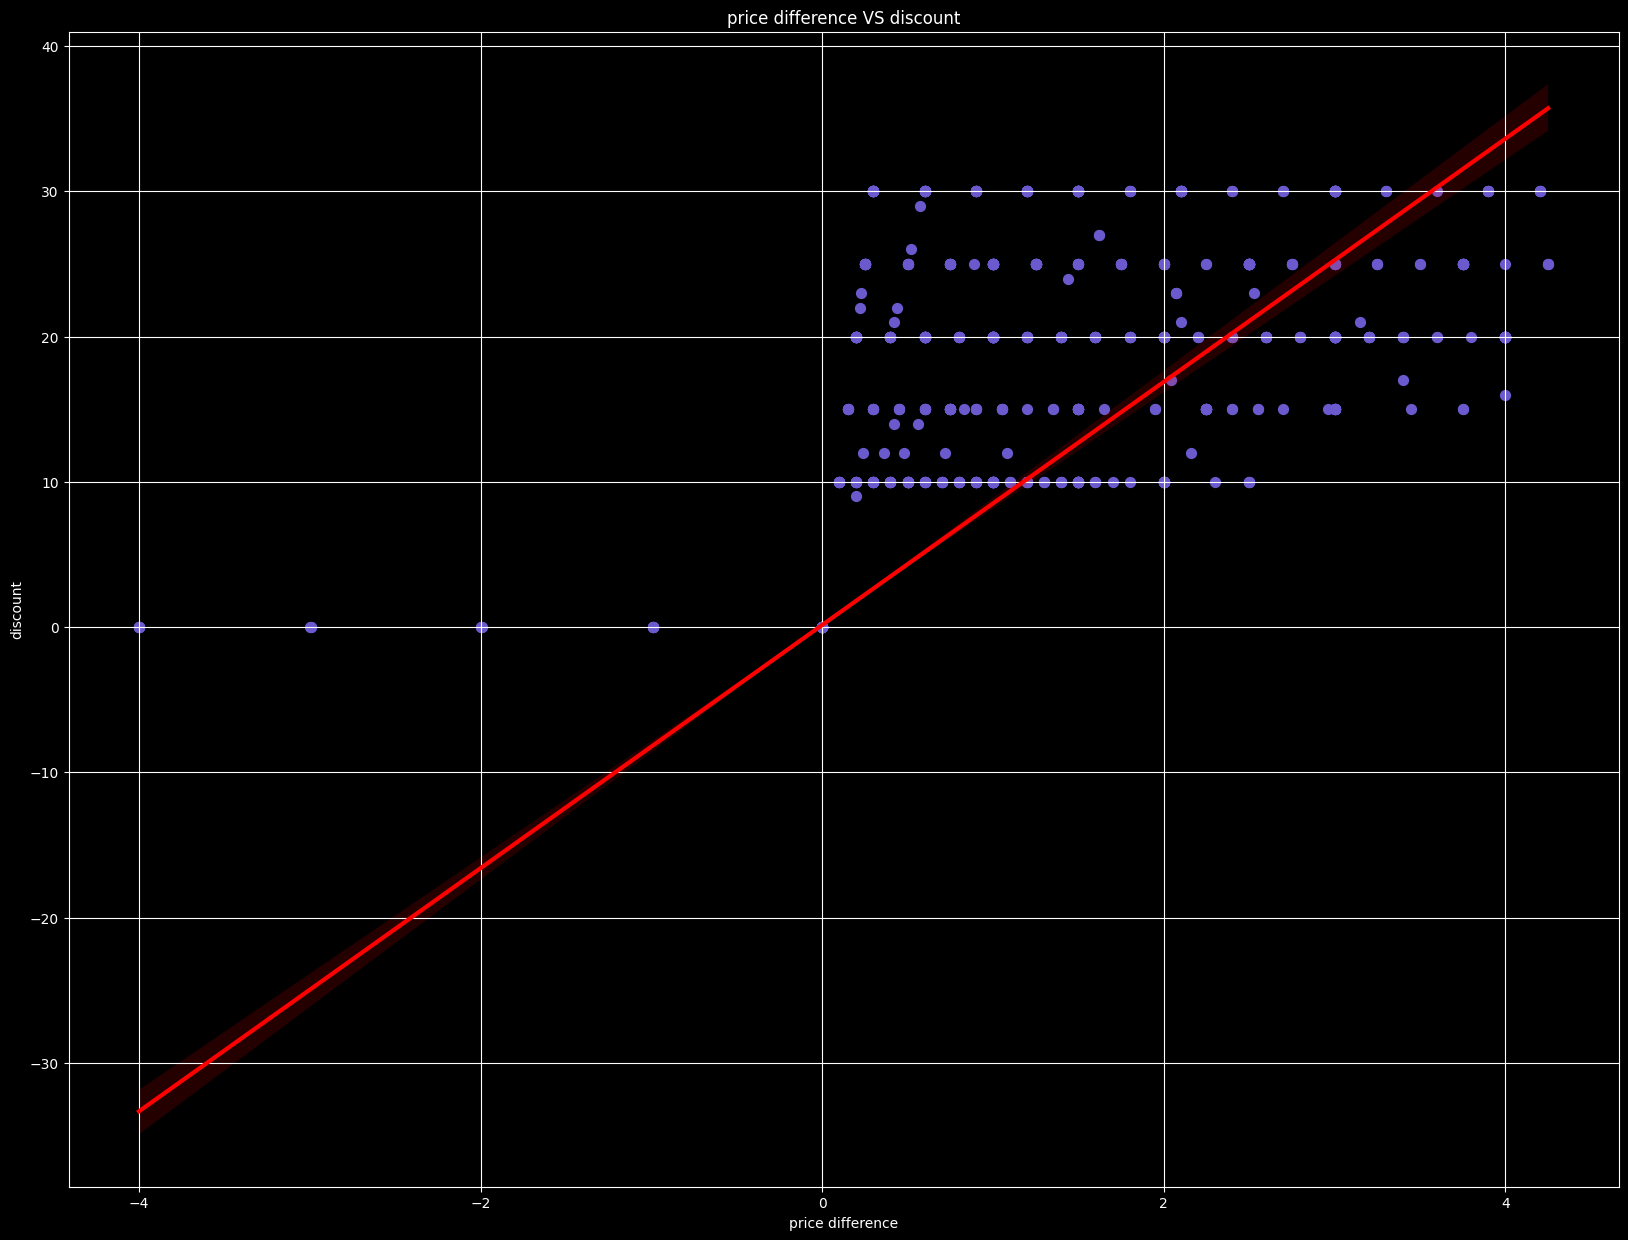

In [144]:
# The relation between the price difference and the discount value .

plt.figure(figsize=(20,15))
sns.regplot(x="price_difference" ,
            y="discount" ,
           data = data , 
            scatter_kws = {"s":50 , "alpha" : 1 , "color" : "#6A5ACD"} , 
            line_kws = {"color" :"red" , "lw" : 3}
                       )
plt.title("price difference VS discount")
plt.xlabel("price difference")
plt.ylabel("discount")

plt.grid()
plt.show()

# The scatter plot shows a strong positive correlation between the price difference and the discount value of video games.
# This means that as the price difference increases, the discount value tends to increase significantly.

In [145]:
##################################################################################################################
##################################################################################################################
##################################################################################################################

In [146]:
# Data Visualization

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   app_id                  39211 non-null  int64         
 1   game_title              39211 non-null  object        
 2   release_date            39211 non-null  datetime64[ns]
 3   win                     39211 non-null  bool          
 4   mac                     39211 non-null  bool          
 5   linux                   39211 non-null  bool          
 6   steam_ranking           39211 non-null  object        
 7   positive_ratio          39211 non-null  int64         
 8   num_of_user_reviews     39211 non-null  int64         
 9   final_price             39211 non-null  float64       
 10  original_price          39211 non-null  float64       
 11  discount                39211 non-null  int64         
 12  steam_deck              39211 non-null  bool  

In [148]:
scatter_fig = px.scatter(data_frame = data ,
                        x = "num_of_user_reviews" ,
                        y = "positive_ratio" , 
                        color = "steam_ranking" , 
                        size="positive_ratio" ,
                        color_discrete_sequence = px.colors.sequential.Agsunset   ,
                        width = 1500 , 
                        height = 1000 ,
                        template = "plotly_dark" , 
                        title= "Nmber Of User Reviews VS Positive Ratio" , 
                        labels = {"x":"Nmber Of User Reviews" , "y":"Positive Ratio" }
                                )
scatter_fig

In [149]:
scatter_fig = px.scatter(data_frame = data ,
                        x = "final_price" ,
                        y = "positive_ratio" , 
                        color = "steam_ranking" , 
                        size="positive_ratio" ,
                        color_discrete_sequence = px.colors.sequential.Sunset   ,
                        width = 1500 , 
                        height = 1000 ,
                        template = "plotly_dark" , 
                        title= "Final Price VS Positive Ratio" , 
                        labels = {"x":"Final Price" , "y":"Positive Ratio" }
                                )
scatter_fig

In [150]:
scatter_fig = px.scatter(data_frame = data ,
                        x = "num_of_recommendations" ,
                        y = "positive_ratio" , 
                        color = "steam_ranking" , 
                        size="positive_ratio" ,
                        color_discrete_sequence = px.colors.sequential.Pinkyl   ,
                        width = 1500 , 
                        height = 1000 ,
                        template = "plotly_dark" , 
                        title= "Nmber Of User Recommendations VS Positive Ratio" , 
                        labels = {"x":"Nmber Of User Recommendations" , "y":"Positive Ratio" }
                                )
scatter_fig

In [151]:
# -------------------------------------------------------------------------------------------------------------------------

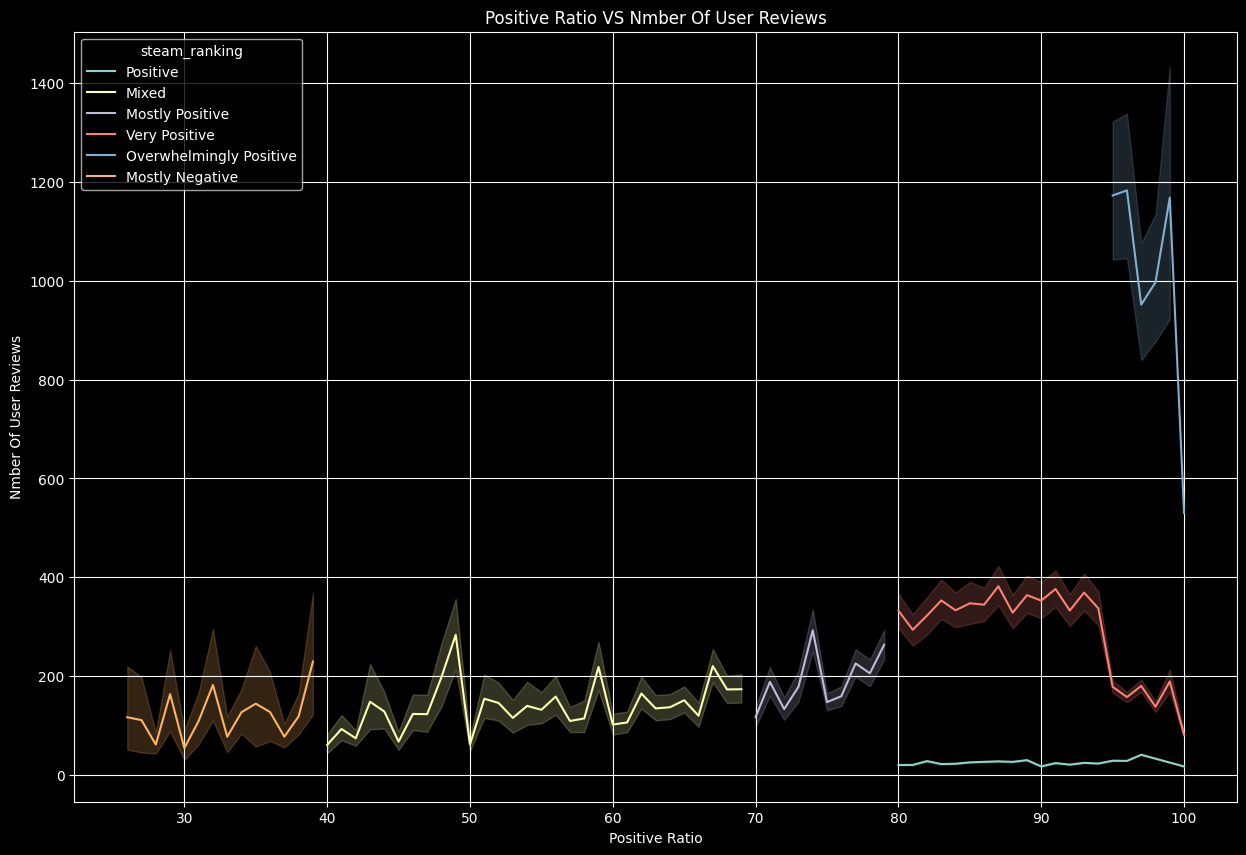

In [152]:
plt.figure(figsize=(15,10))

sns.lineplot(x="positive_ratio" ,
                y="num_of_user_reviews" ,
                data = data,
                hue="steam_ranking" )

plt.title("Positive Ratio VS Nmber Of User Reviews")
plt.xlabel("Positive Ratio")
plt.ylabel("Nmber Of User Reviews")
plt.grid()
plt.show()

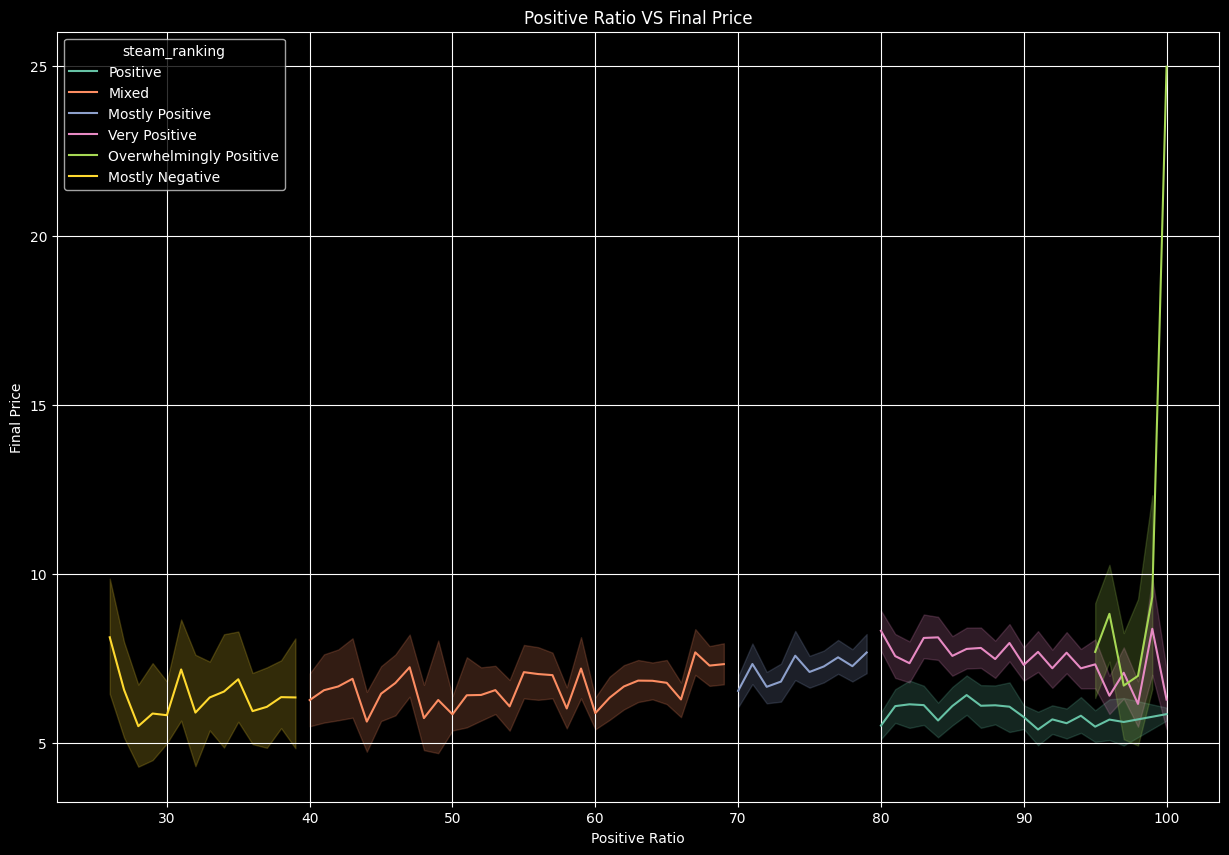

In [153]:
plt.figure(figsize=(15,10))

sns.lineplot(x="positive_ratio" ,
                y="final_price" ,
                data = data,
                hue="steam_ranking" , 
                palette = "Set2")

plt.title("Positive Ratio VS Final Price")
plt.xlabel("Positive Ratio")
plt.ylabel("Final Price")
plt.grid(True)
plt.show()

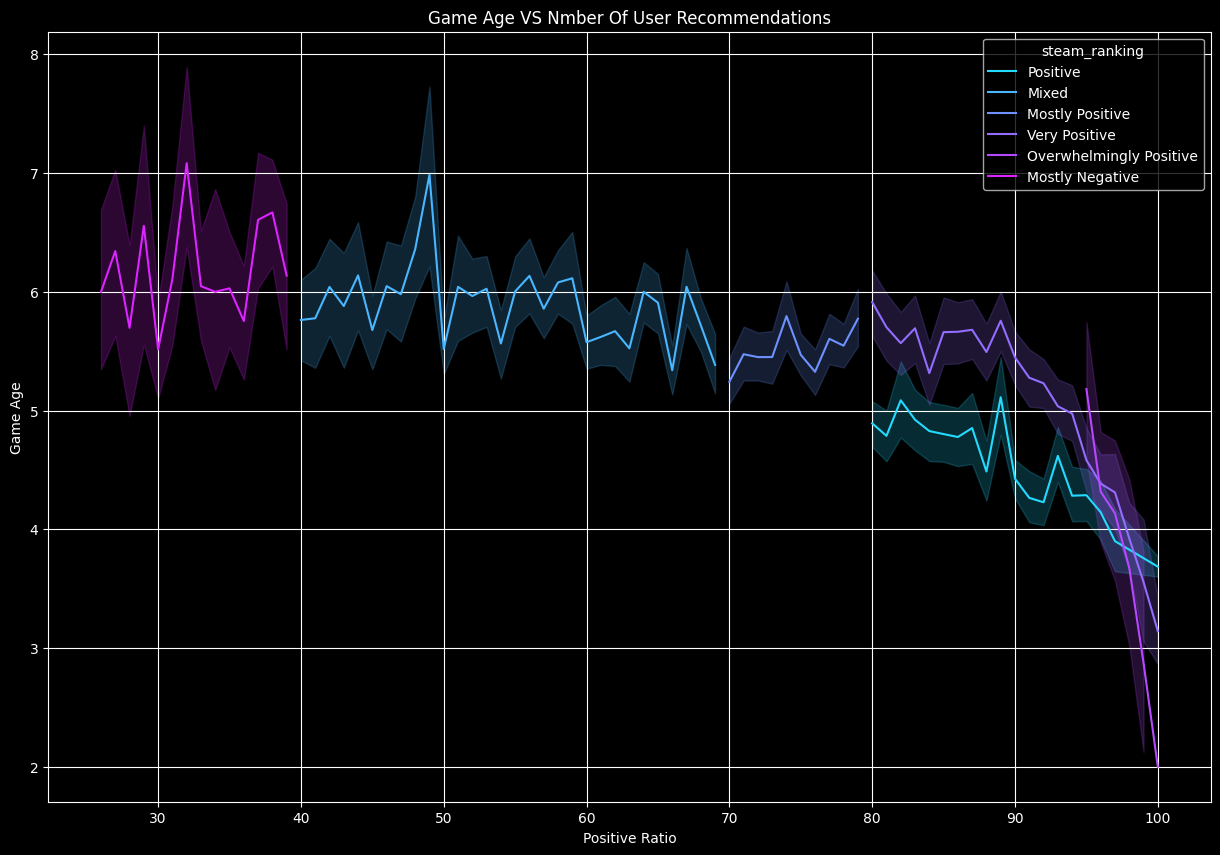

In [154]:
plt.figure(figsize=(15,10))


sns.lineplot(x="positive_ratio" ,
                y="game_age" ,
                data = data,
                hue="steam_ranking" , 
               palette = "cool")

plt.title("Game Age VS Nmber Of User Recommendations")
plt.xlabel("Positive Ratio")
plt.ylabel("Game Age")
plt.grid()
plt.show()

In [155]:
# -------------------------------------------------------------------------------------------------------------------------

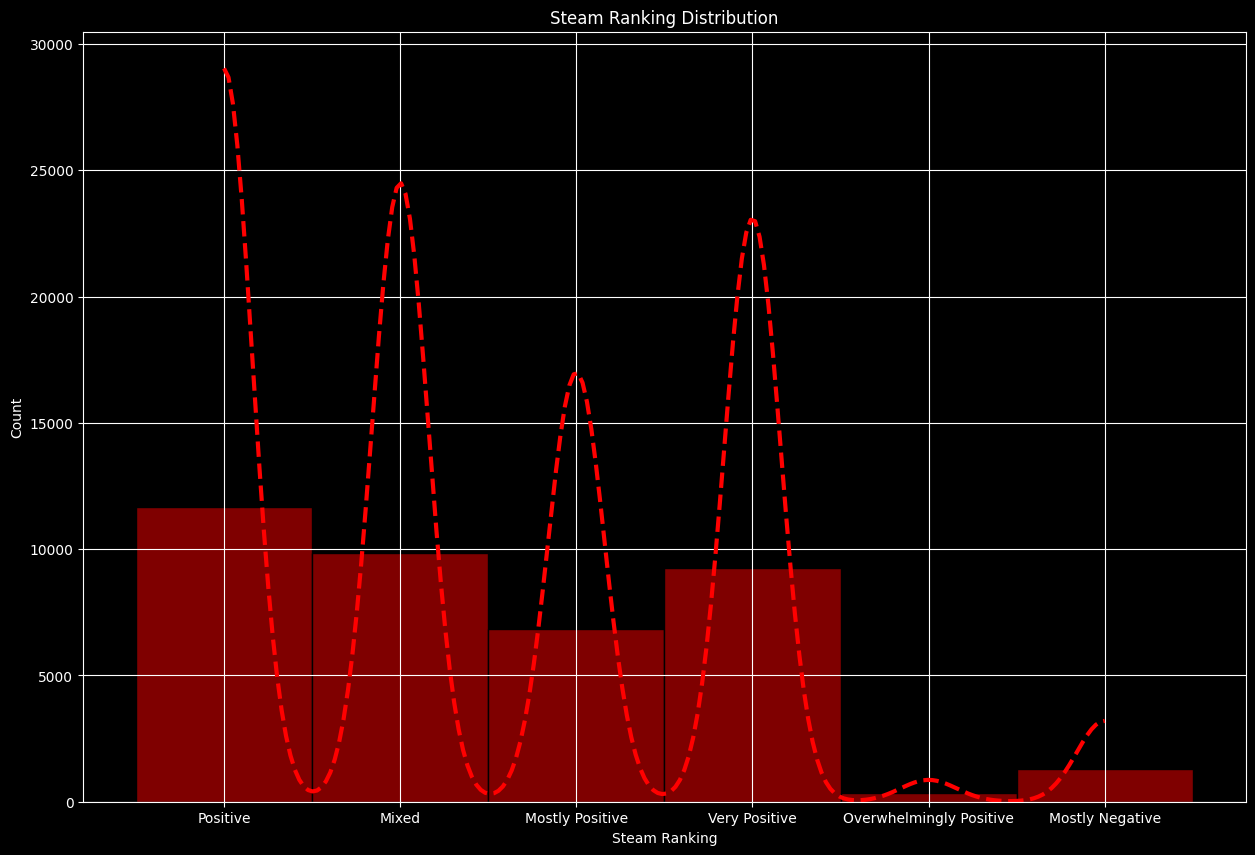

In [156]:
plt.figure(figsize=(15,10))

sns.histplot(data["steam_ranking"] ,
             kde=True , 
             bins=20 , 
             stat="count", 
             color = "red" ,
             edgecolor="black" ,
             line_kws = {
                 "linewidth" : 3 , 
                 "linestyle" : "--" } 
                        )

plt.title("Steam Ranking Distribution")
plt.xlabel("Steam Ranking")
plt.ylabel("Count")

plt.grid()
plt.show()

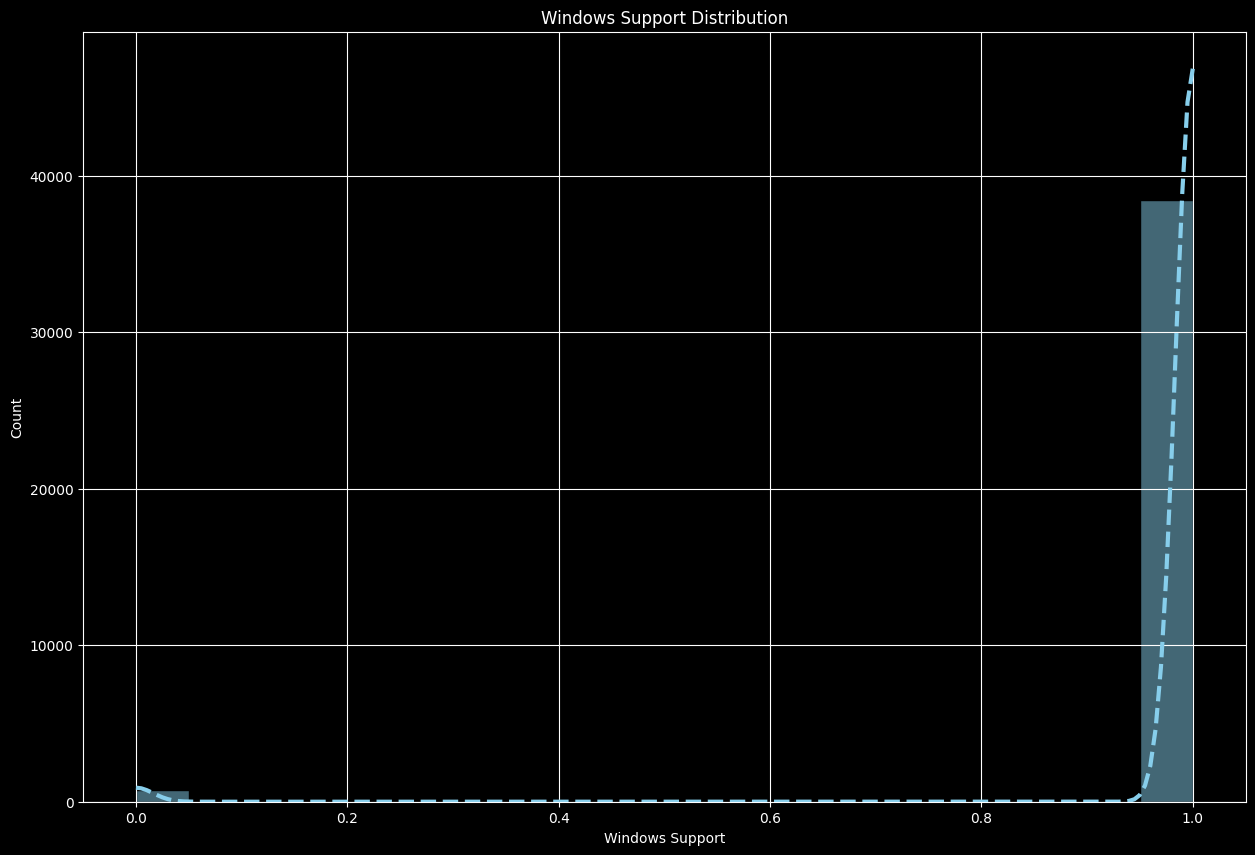

In [157]:
plt.figure(figsize=(15,10))

sns.histplot(data["win"] ,
             kde=True , 
             bins=20 , 
             stat="count", 
             color = "skyblue" ,
             edgecolor="black" ,
             line_kws = {
                 "linewidth" : 3 , 
                 "linestyle" : "--" } 
                        )

plt.title("Windows Support Distribution")
plt.xlabel("Windows Support")
plt.ylabel("Count")

plt.grid()
plt.show()

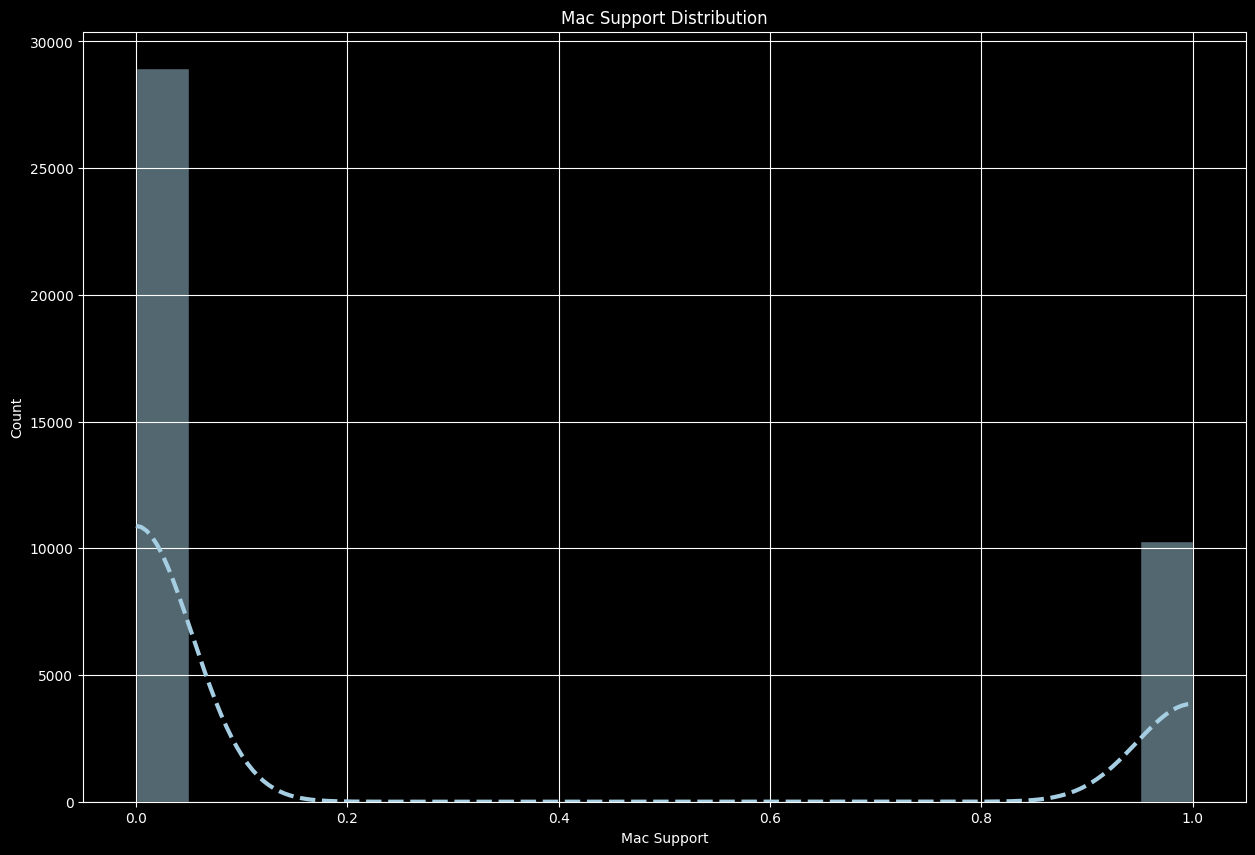

In [158]:
plt.figure(figsize=(15,10))

sns.histplot(data["mac"] ,
             kde=True , 
             bins=20 , 
             stat="count", 
             color = "#a6cee3" ,
             edgecolor="black" ,
             line_kws = {
                 "linewidth" : 3 , 
                 "linestyle" : "--" } 
                        )

plt.title("Mac Support Distribution")
plt.xlabel("Mac Support")
plt.ylabel("Count")

plt.grid()
plt.show()

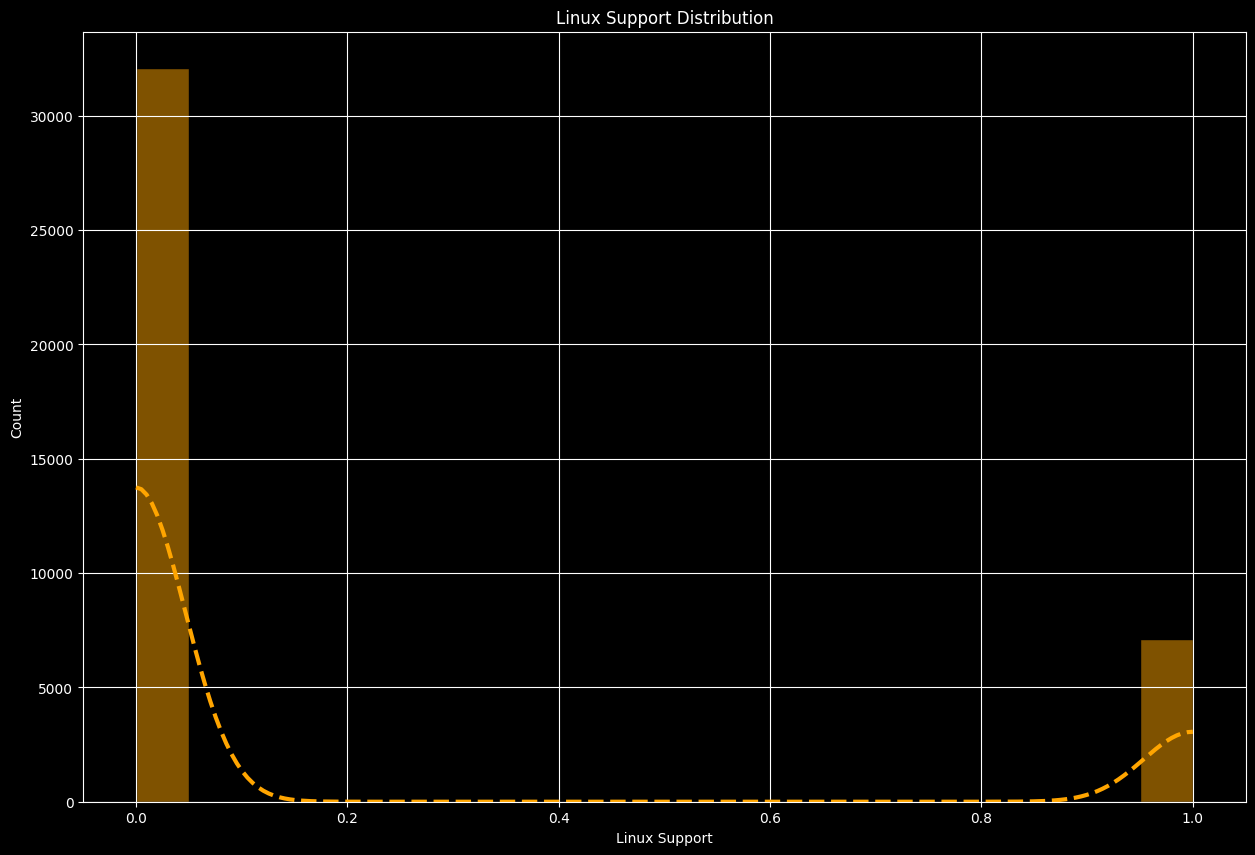

In [159]:
plt.figure(figsize=(15,10))

sns.histplot(data["linux"] ,
             kde=True , 
             bins=20 , 
             stat="count", 
             color = "orange" ,
             edgecolor="black" ,
             line_kws = {
                 "linewidth" : 3 , 
                 "linestyle" : "--" } 
                        )

plt.title("Linux Support Distribution")
plt.xlabel("Linux Support")
plt.ylabel("Count")

plt.grid()
plt.show()

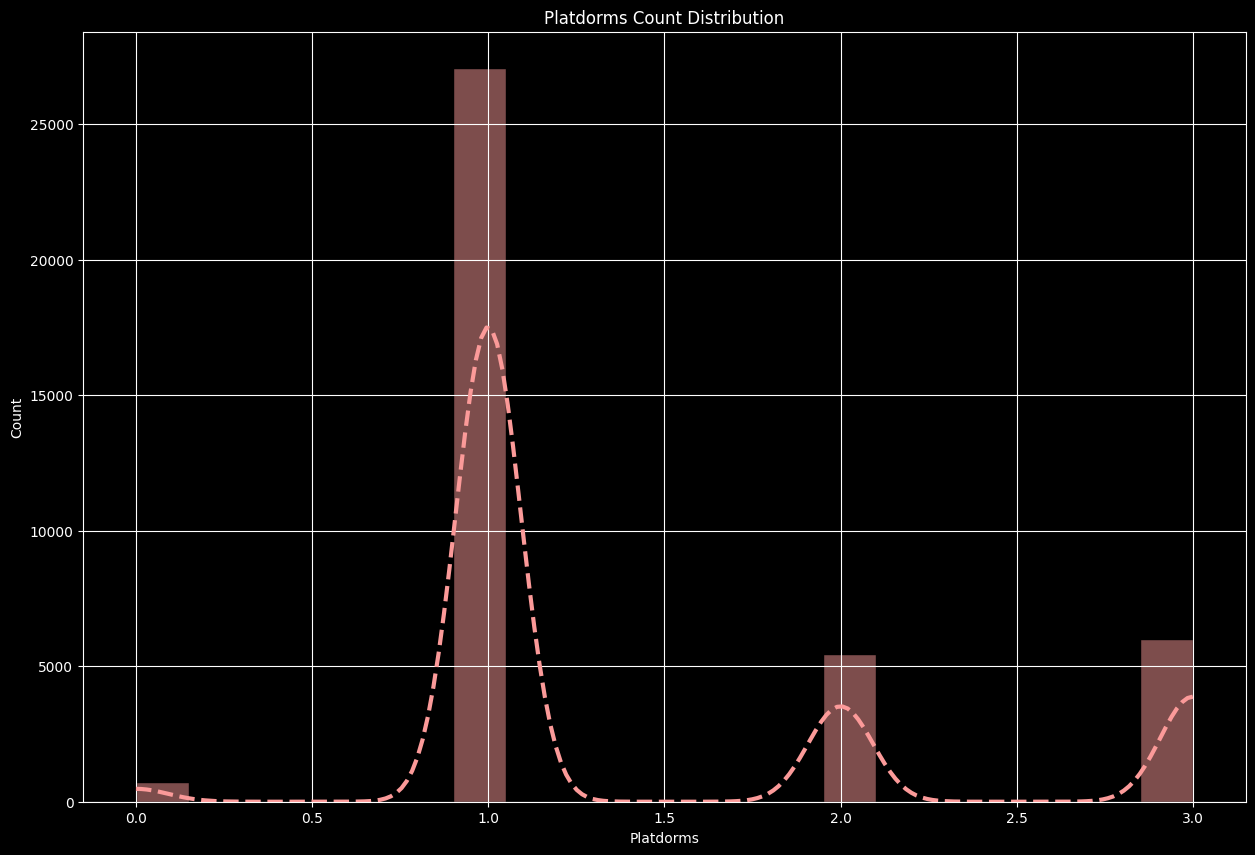

In [160]:
plt.figure(figsize=(15,10))

sns.histplot(data["platforms_count"] ,
             kde=True , 
             bins=20 , 
             stat="count", 
             color = "#fb9a99" ,
             edgecolor="black" ,
             line_kws = {
                 "linewidth" : 3 , 
                 "linestyle" : "--" } 
                        )

plt.title("Platdorms Count Distribution")
plt.xlabel("Platdorms")
plt.ylabel("Count")

plt.grid()
plt.show()

/tmp/ipykernel_214/3524227460.py:5: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_214/3524227460.py:25: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.




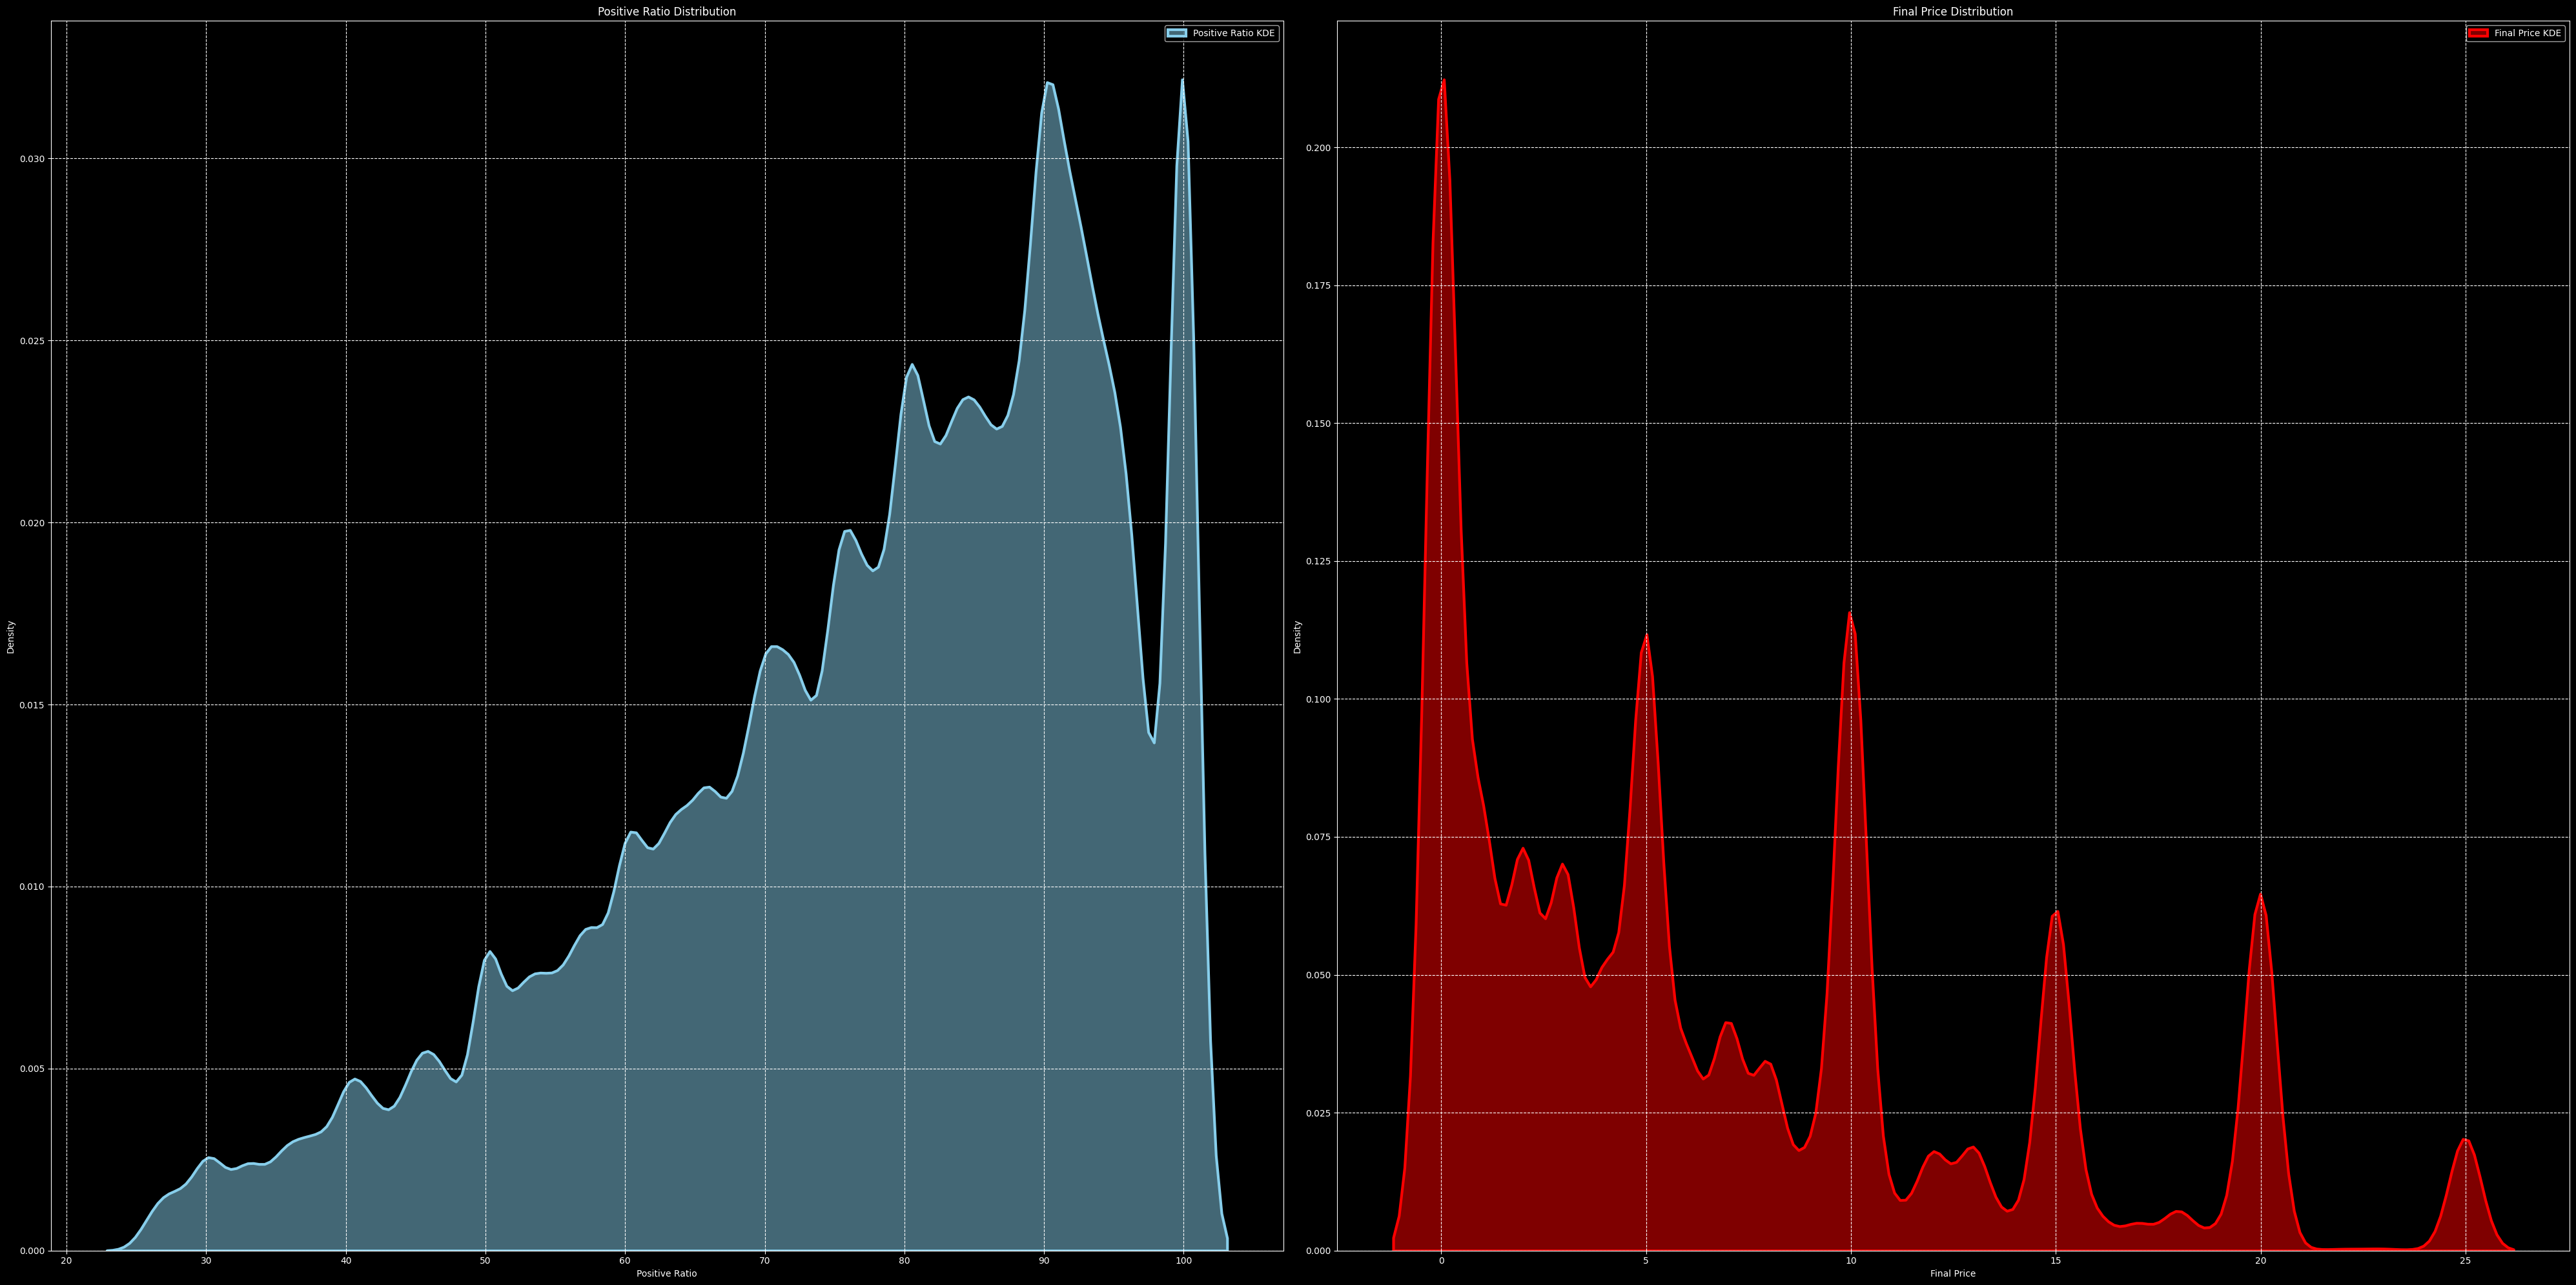

In [161]:
plt.figure(figsize=(40,20))


plt.subplot(1,2,1)
sns.kdeplot(
    data=data["positive_ratio"],  
    color="skyblue",                
    bw_adjust=0.5,               
    linestyle="-",             
    linewidth=3,                 
    fill=True,                   
    alpha=0.5,                   
    label="Positive Ratio KDE",    
    kernel="gau"  )             

plt.title("Positive Ratio Distribution")
plt.xlabel("Positive Ratio")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")

## ----

plt.subplot(1,2,2)
sns.kdeplot(
    data=data["final_price"],   
    color="red",                
    bw_adjust=0.5,               
    linestyle="-",              
    linewidth=3,                 
    fill=True,                   
    alpha=0.5,                   
    label="Final Price KDE",    
    kernel="gau"            
            )

plt.title("Final Price Distribution")
plt.xlabel("Final Price")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")



# ------------
plt.tight_layout()
plt.show()

/tmp/ipykernel_214/1054887743.py:5: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_214/1054887743.py:26: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.




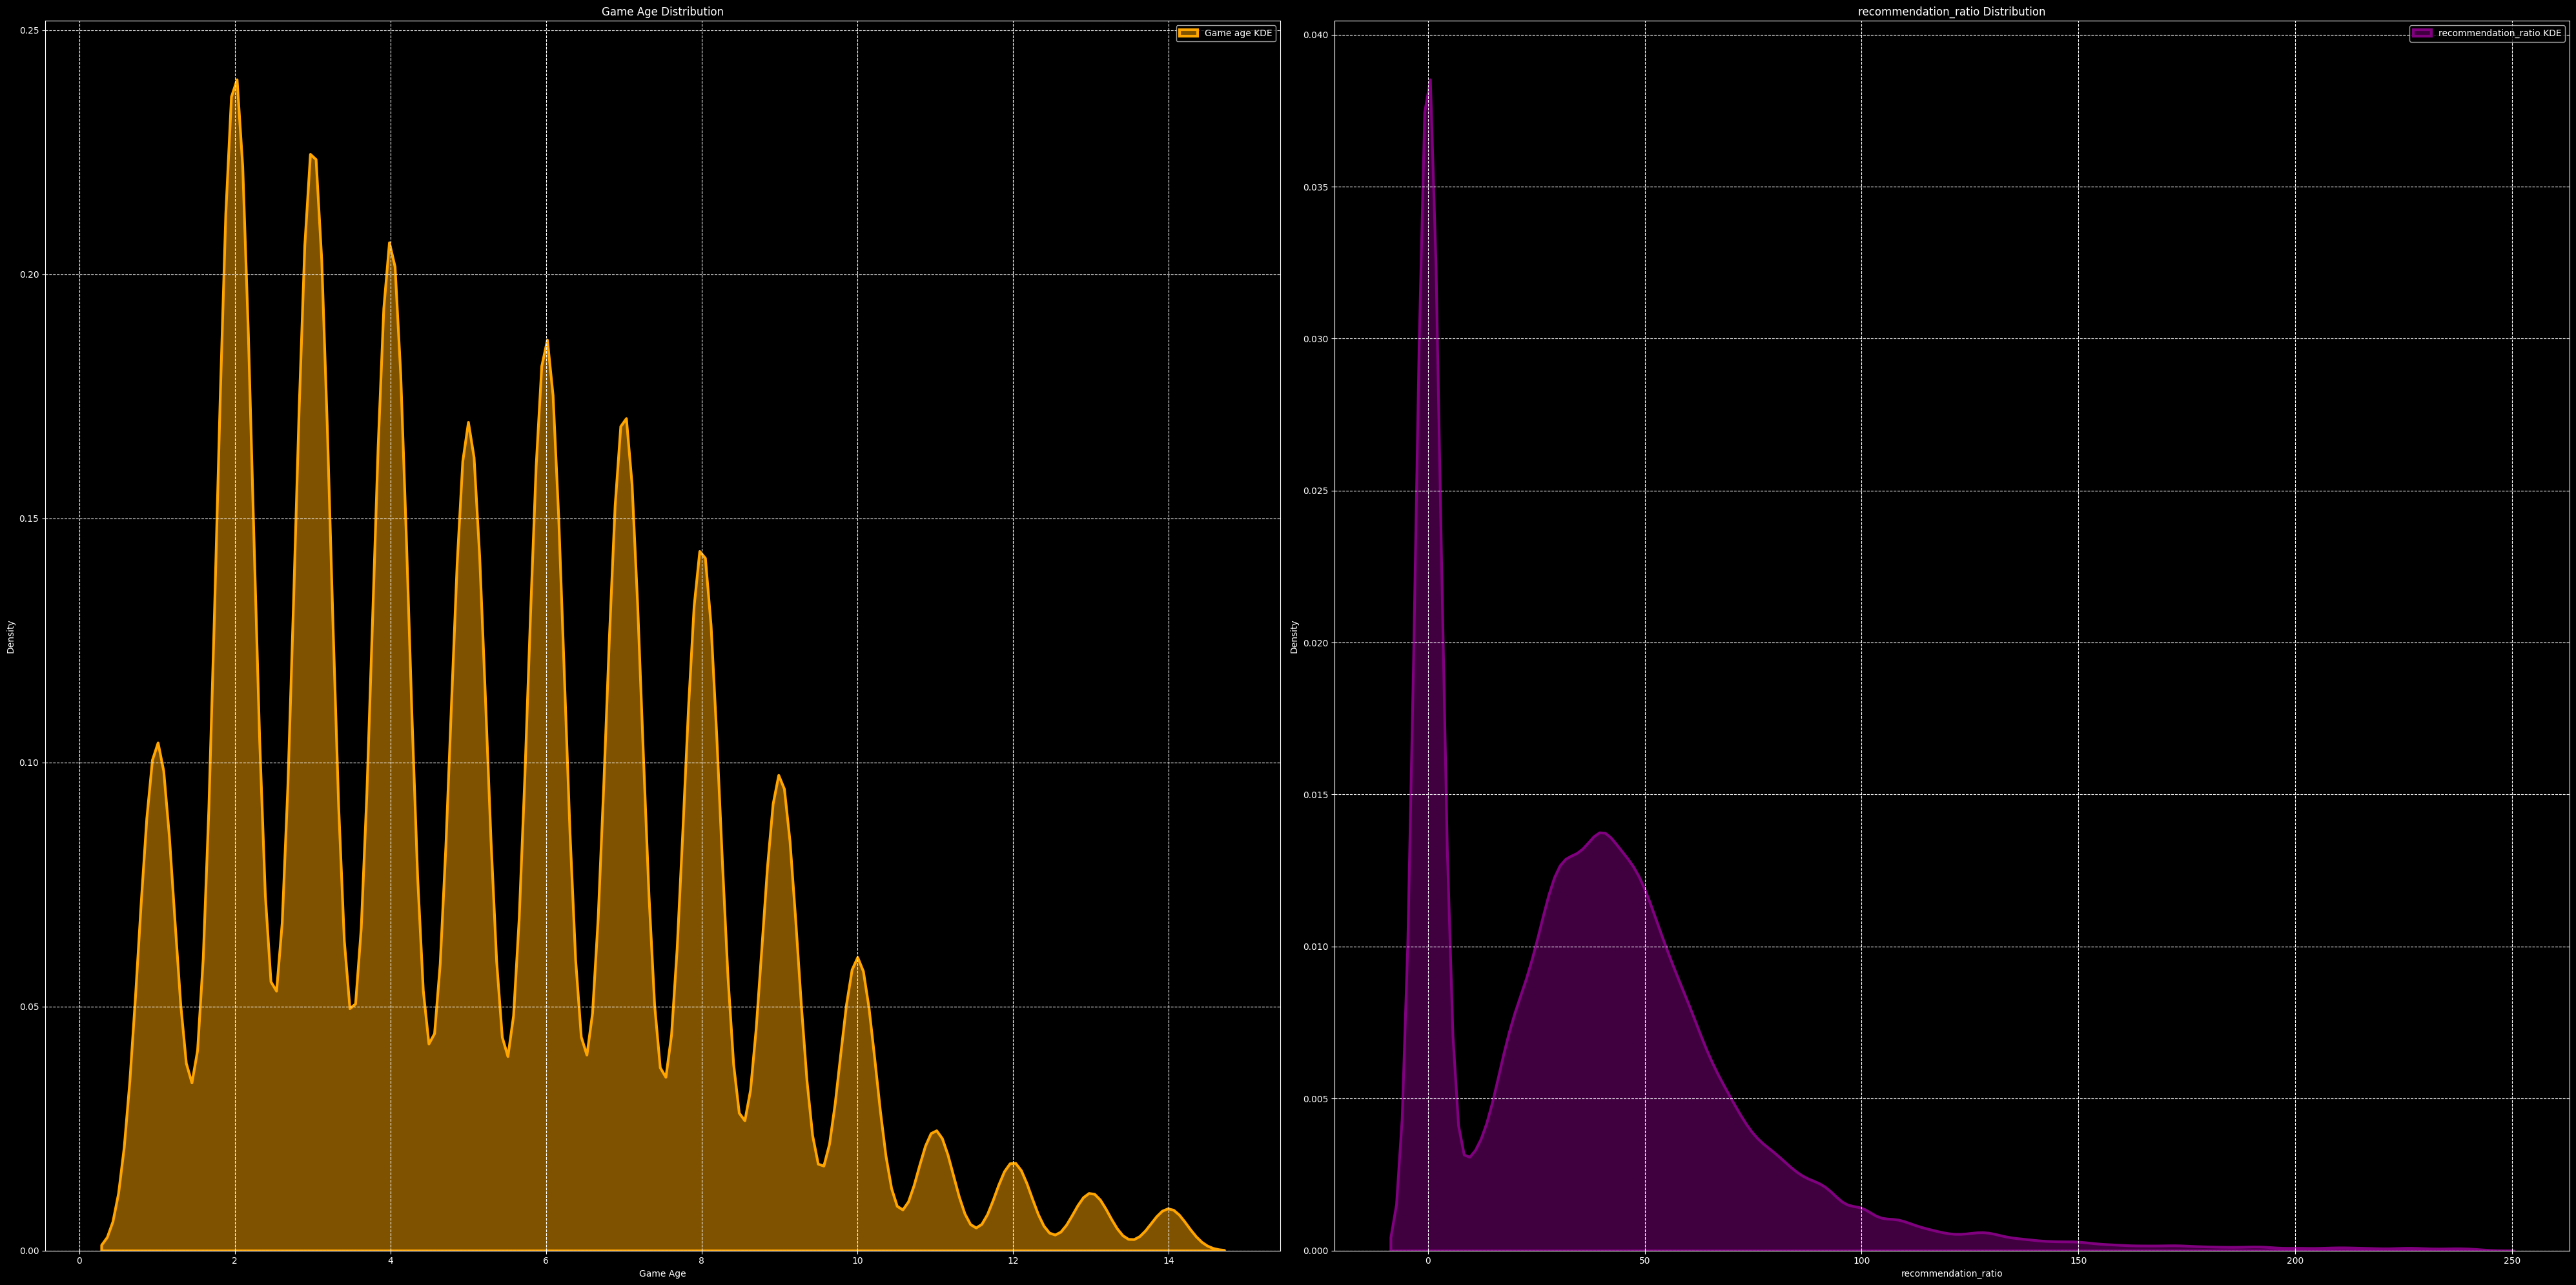

In [162]:
plt.figure(figsize=(40,20))


plt.subplot(1,2,1)
sns.kdeplot(
    data=data["game_age"],   
    color="orange",              
    bw_adjust=0.7,               
    linestyle="-",              
    linewidth=3,               
    fill=True,               
    alpha=0.5,                 
    label="Game age KDE",    
    kernel="gau"                
            )

plt.title("Game Age Distribution")
plt.xlabel("Game Age")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")

# -----

plt.subplot(1,2,2)
sns.kdeplot(
    data=data["recommendation_ratio"], 
    color="purple",                
    bw_adjust=0.7,               
    linestyle="-",            
    linewidth=3,                
    fill=True,               
    alpha=0.5,                 
    label="recommendation_ratio KDE",  
    kernel="gau"                
            )

plt.title("recommendation_ratio Distribution")
plt.xlabel("recommendation_ratio")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")

# ------------
plt.tight_layout()
plt.show()

/tmp/ipykernel_214/159232656.py:3: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.




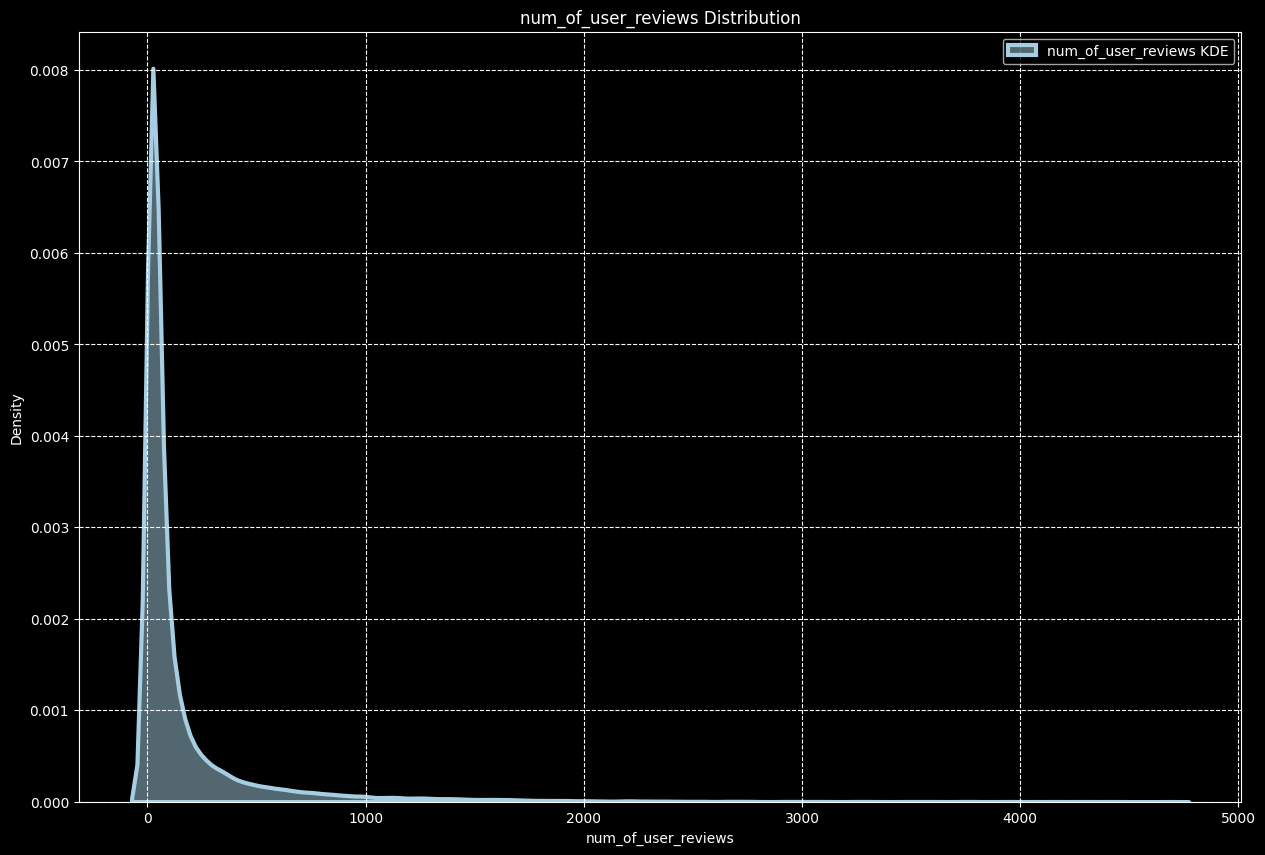

In [163]:
plt.figure(figsize=(15,10))

sns.kdeplot(
    data=data["num_of_user_reviews"],   
    color="#a6cee3",              
    bw_adjust=0.7,               
    linestyle="-",              
    linewidth=3,               
    fill=True,               
    alpha=0.5,                 
    label="num_of_user_reviews KDE",    
    kernel="gau"                
            )

plt.title("num_of_user_reviews Distribution")
plt.xlabel("num_of_user_reviews")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")
plt.show()

/tmp/ipykernel_214/1552508532.py:5: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_214/1552508532.py:26: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.




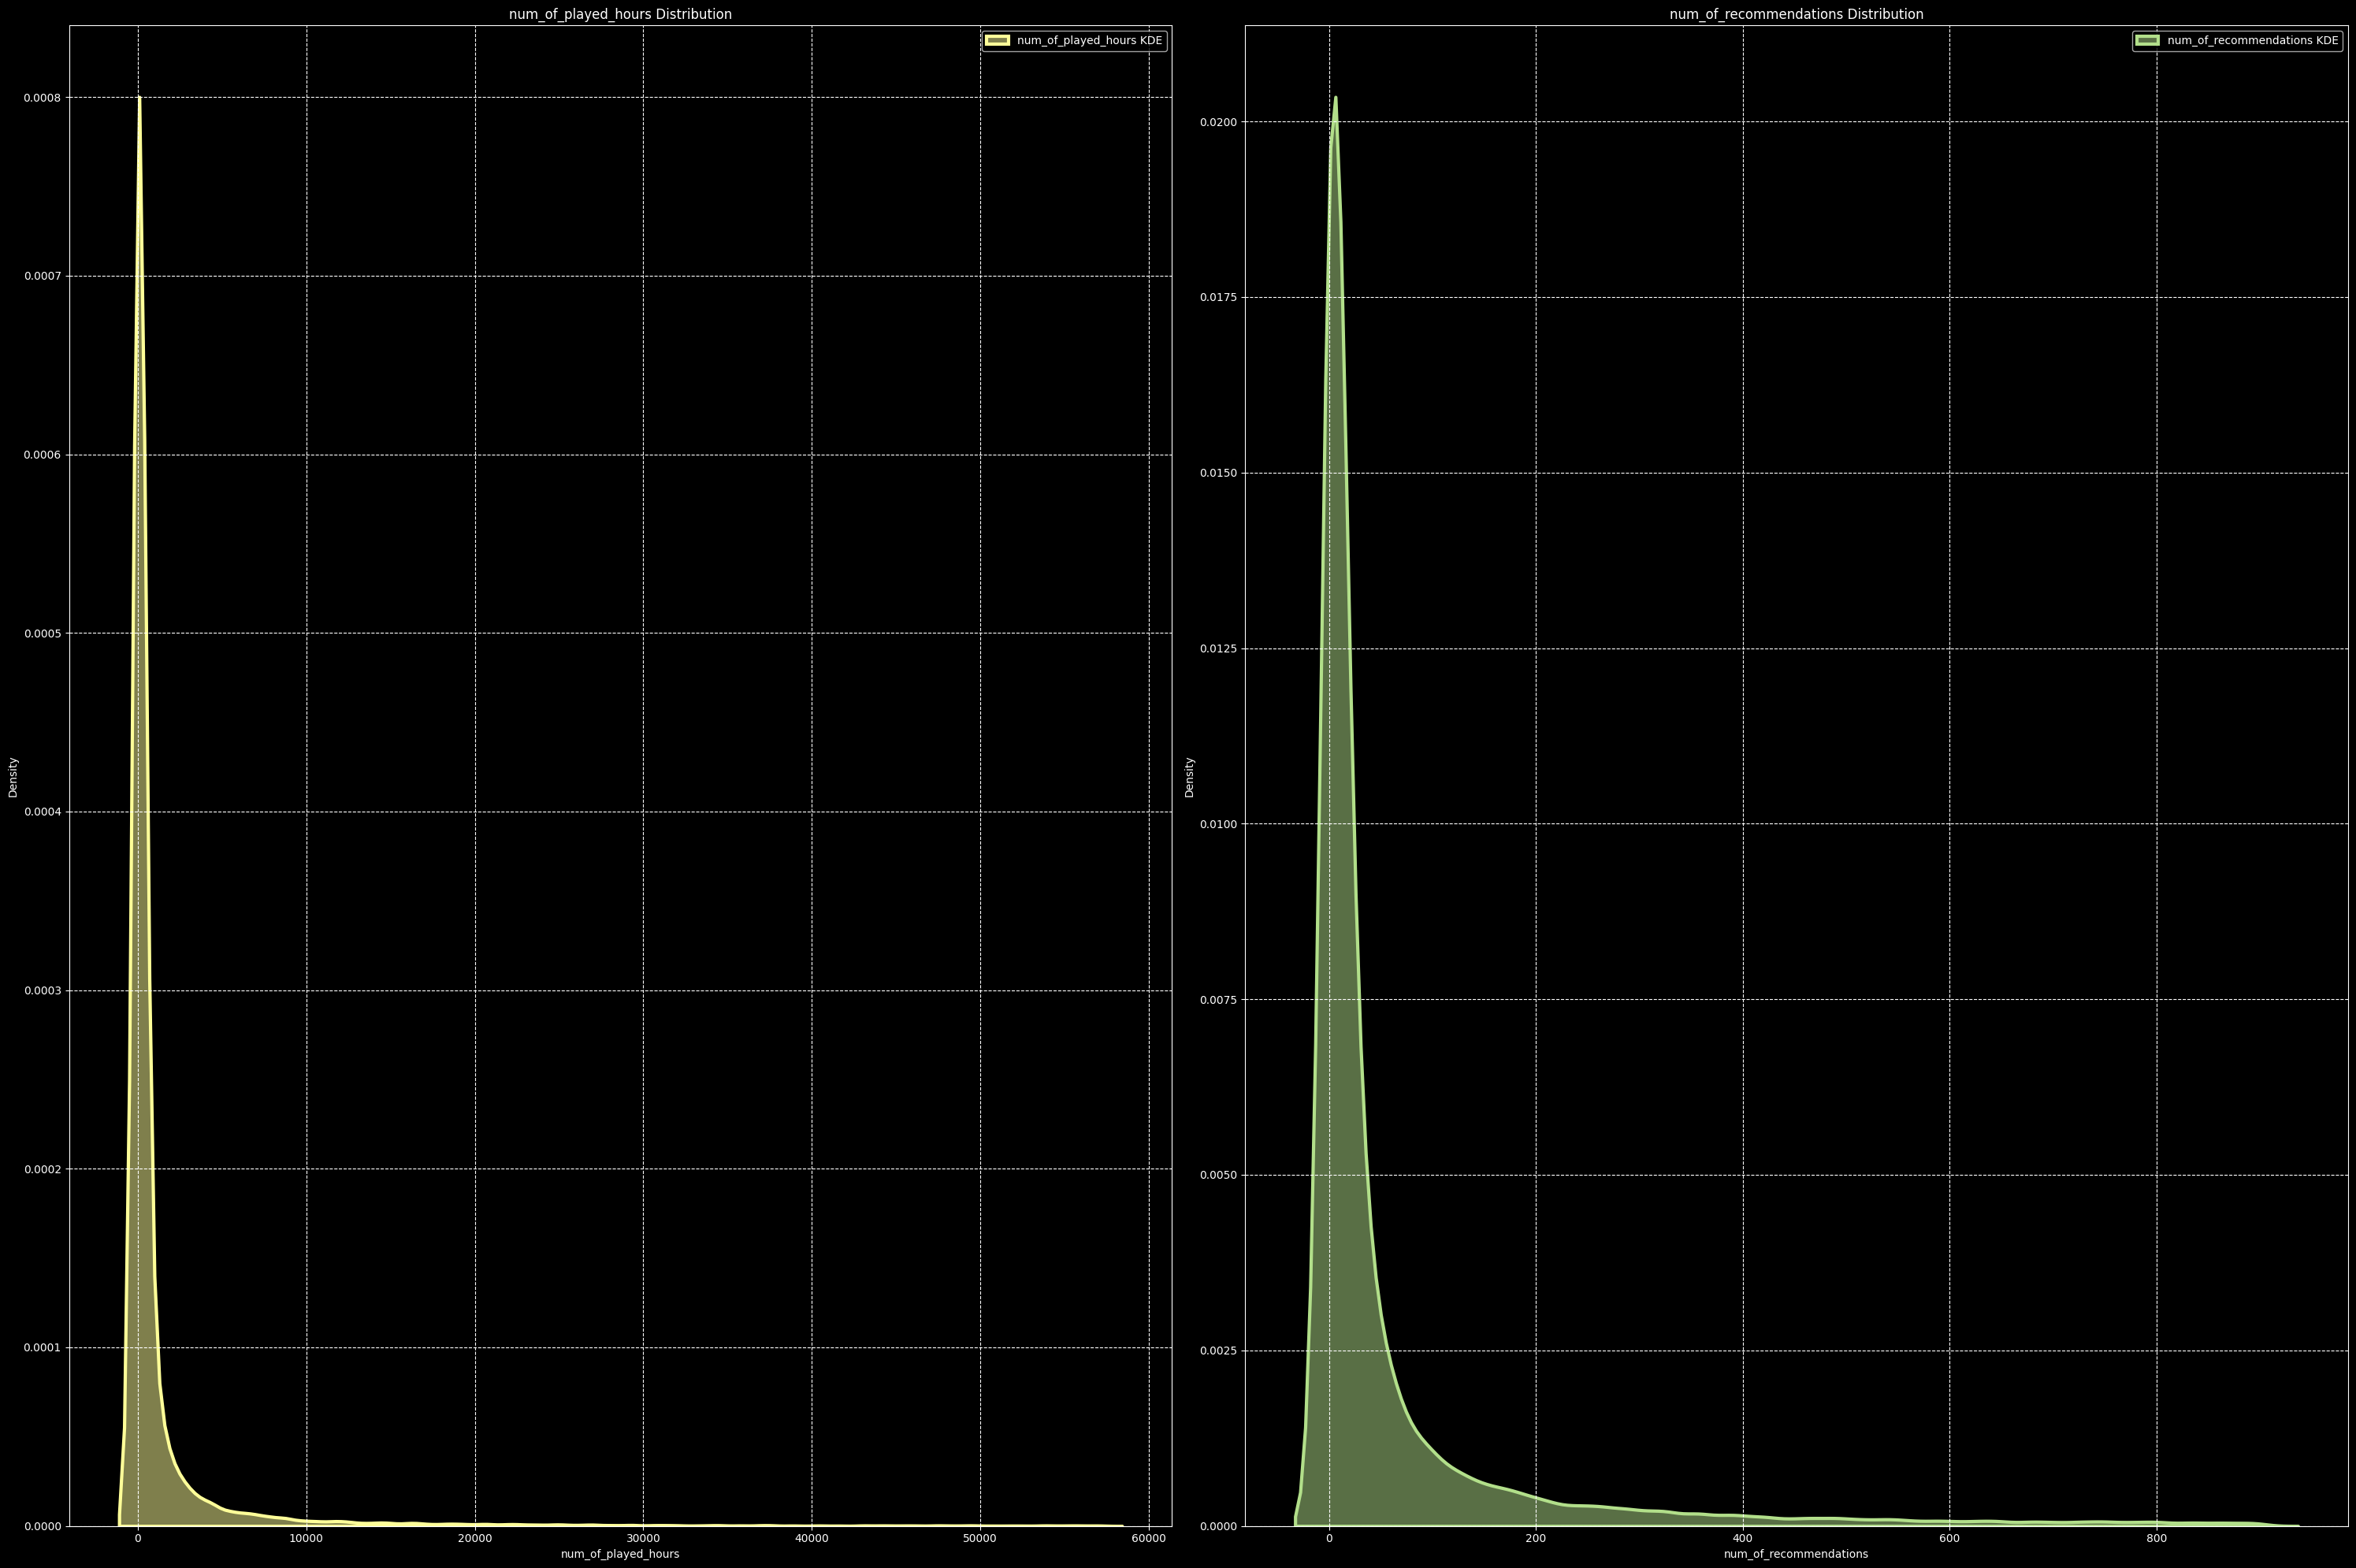

In [164]:
plt.figure(figsize=(30,20))


plt.subplot(1,2,1)
sns.kdeplot(
    data=data["num_of_played_hours"],   
    color="#ffff99",              
    bw_adjust=0.7,               
    linestyle="-",              
    linewidth=3,               
    fill=True,               
    alpha=0.5,                 
    label="num_of_played_hours KDE",    
    kernel="gau"                
            )

plt.title("num_of_played_hours Distribution")
plt.xlabel("num_of_played_hours")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")

# -----

plt.subplot(1,2,2)
sns.kdeplot(
    data=data["num_of_recommendations"], 
    color="#b2df8a",                
    bw_adjust=0.7,               
    linestyle="-",            
    linewidth=3,                
    fill=True,               
    alpha=0.5,                 
    label="num_of_recommendations KDE",  
    kernel="gau"                
            )

plt.title("num_of_recommendations Distribution")
plt.xlabel("num_of_recommendations")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle="--")

# ------------
plt.tight_layout()
plt.show()

In [165]:
# -------------------------------------------------------------------------------------------------------------------------

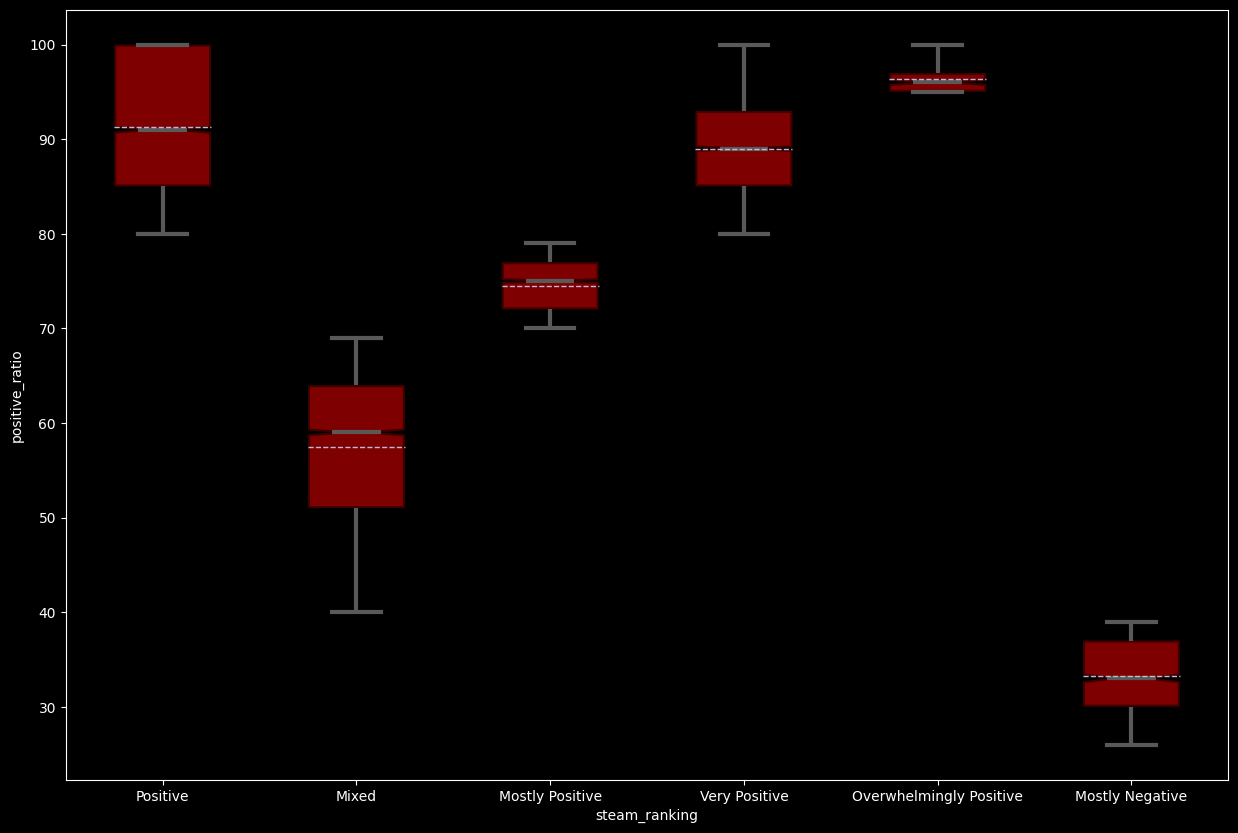

In [166]:
plt.figure(figsize=(15,10))

sns.boxplot(x="steam_ranking" , 
           y="positive_ratio" , 
           data = data , 
           palette="Set2" , 
           hue="steam_ranking" , 
           linewidth=3 , 
           width = 0.5 , 
           showfliers=True , 
           notch = True , 
           meanline = True , 
           showmeans = True ,
           boxprops = dict( facecolor = "red" , alpha = 0.5 , edgecolor = "black" ))


plt.show()

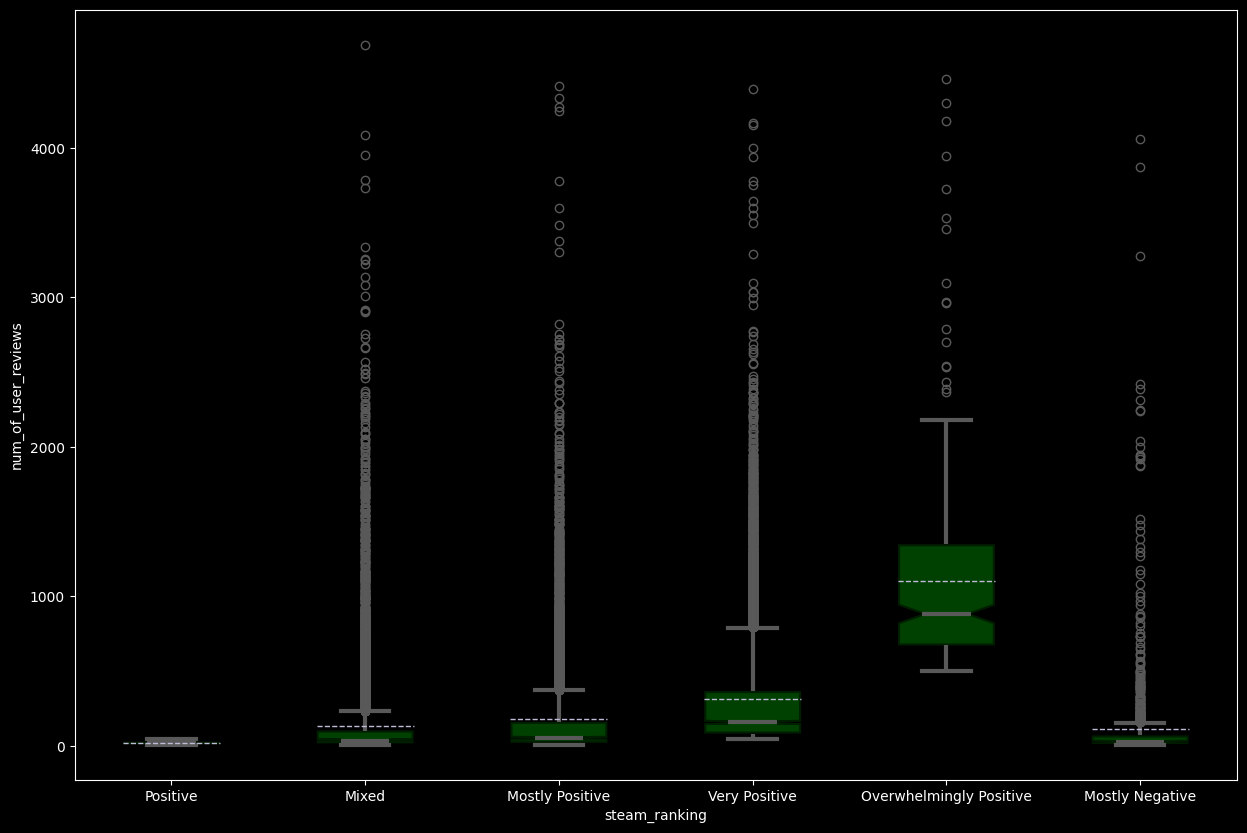

In [167]:
plt.figure(figsize=(15,10))

sns.boxplot(x="steam_ranking" , 
           y="num_of_user_reviews" , 
           data = data , 
           palette="Set2" , 
           hue="steam_ranking" , 
           linewidth=3 , 
           width = 0.5 , 
           showfliers=True , 
           notch = True , 
           meanline = True , 
           showmeans = True ,
           boxprops = dict( facecolor = "green" , alpha = 0.5 , edgecolor = "black" ))


plt.show()

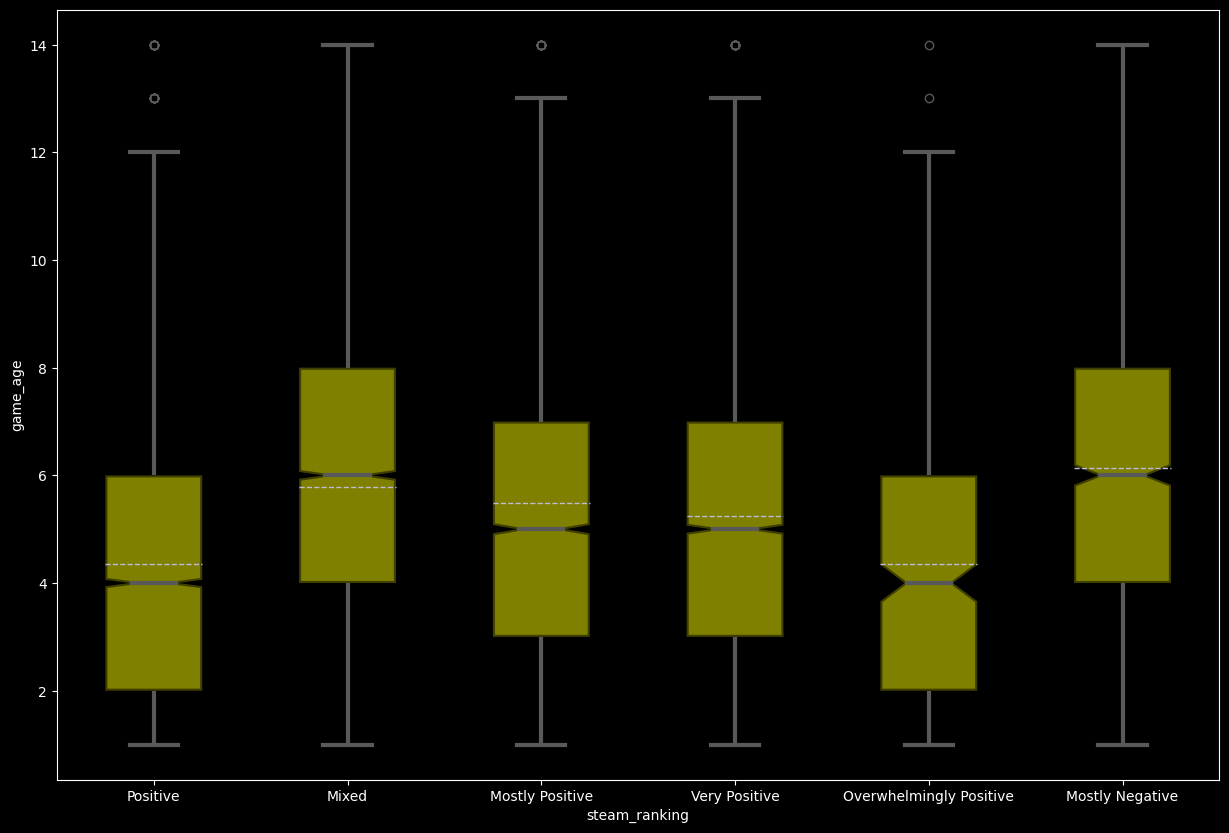

In [168]:
plt.figure(figsize=(15,10))

sns.boxplot(x="steam_ranking" , 
           y="game_age" , 
           data = data , 
           palette="Set2" , 
           hue="steam_ranking" , 
           linewidth=3 , 
           width = 0.5 , 
           showfliers=True , 
           notch = True , 
           meanline = True , 
           showmeans = True ,
           boxprops = dict( facecolor = "yellow" , alpha = 0.5 , edgecolor = "black" ))


plt.show()

In [169]:
# -------------------------------------------------------------------------------------------------------------------------

In [170]:
# Pie PLots

In [171]:
val_counts = data["steam_ranking"].value_counts()
counts =  list(val_counts)
labels = list(val_counts.index)

pie_fig = px.pie(values=counts , 
                names = labels , 
                color_discrete_sequence = px.colors.sequential.Jet , 
                template = "plotly_dark" , 
                width = 1000 , 
                height = 1000 , 
                title = "Steam Ranks Pie Chart" )

pie_fig.update_traces(hoverinfo="label+percent" , 
                     textinfo = "label+percent" , 
                     pull = [0,0,0,0,0,0.1]  ,
                     hole = 0.2 )

pie_fig

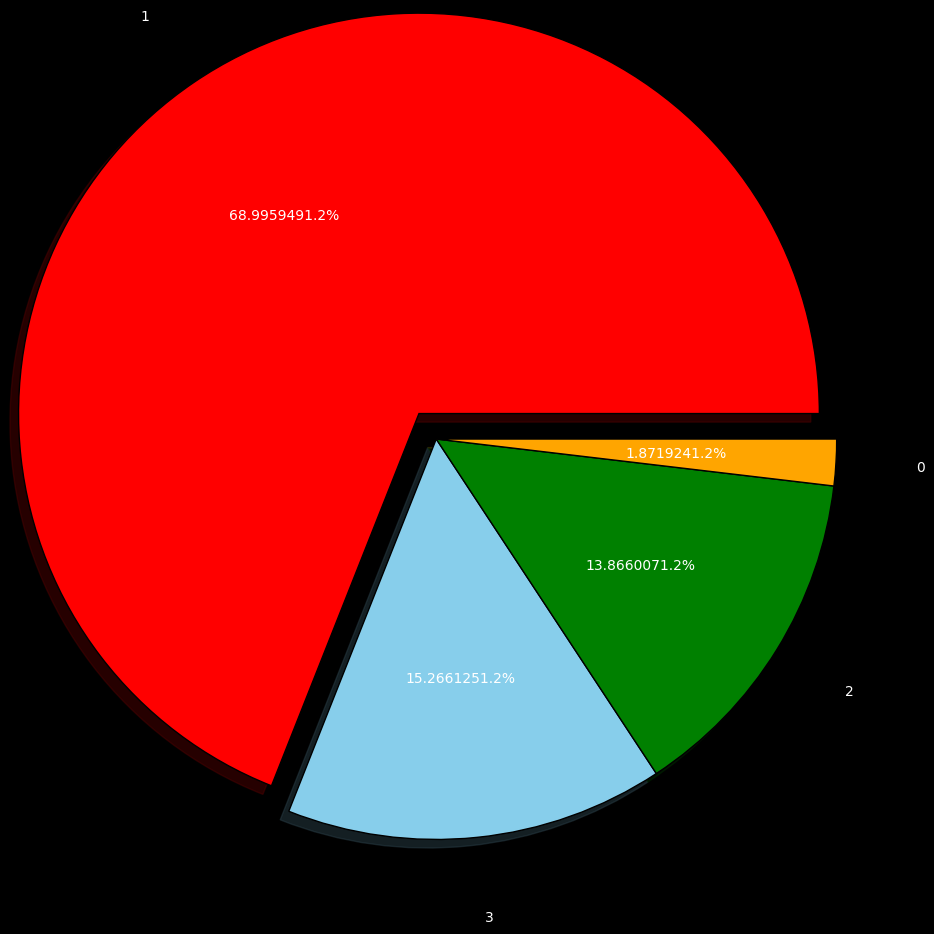

In [172]:
val_counts = data["platforms_count"].value_counts()
counts =  list(val_counts)
labels = list(val_counts.index)

plt.figure(figsize=(15,10))

plt.pie(counts , 
       labels = labels  ,
       wedgeprops = {"edgecolor" : "black"} , 
       explode = [0.1,0,0,0] , 
       colors = ["red" , "skyblue" , "green" , "orange"] ,
       shadow = True , 
       startangle = 0 , 
       autopct = "%f1.2%%" , 
        rotatelabels = False , 
        radius = 1.3 , 
        labeldistance = 1.2
                           )

plt.show()

In [173]:
# -------------------------------------------------------------------------------------------------------------------------

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   app_id                  39211 non-null  int64         
 1   game_title              39211 non-null  object        
 2   release_date            39211 non-null  datetime64[ns]
 3   win                     39211 non-null  bool          
 4   mac                     39211 non-null  bool          
 5   linux                   39211 non-null  bool          
 6   steam_ranking           39211 non-null  object        
 7   positive_ratio          39211 non-null  int64         
 8   num_of_user_reviews     39211 non-null  int64         
 9   final_price             39211 non-null  float64       
 10  original_price          39211 non-null  float64       
 11  discount                39211 non-null  int64         
 12  steam_deck              39211 non-null  bool  

In [175]:
avg_data = data.pivot_table(index="steam_ranking" , 
                             values =  ["final_price" , "num_of_recommendations"  , "num_of_played_hours" , "num_of_user_reviews"]  ,
                             aggfunc = "mean")

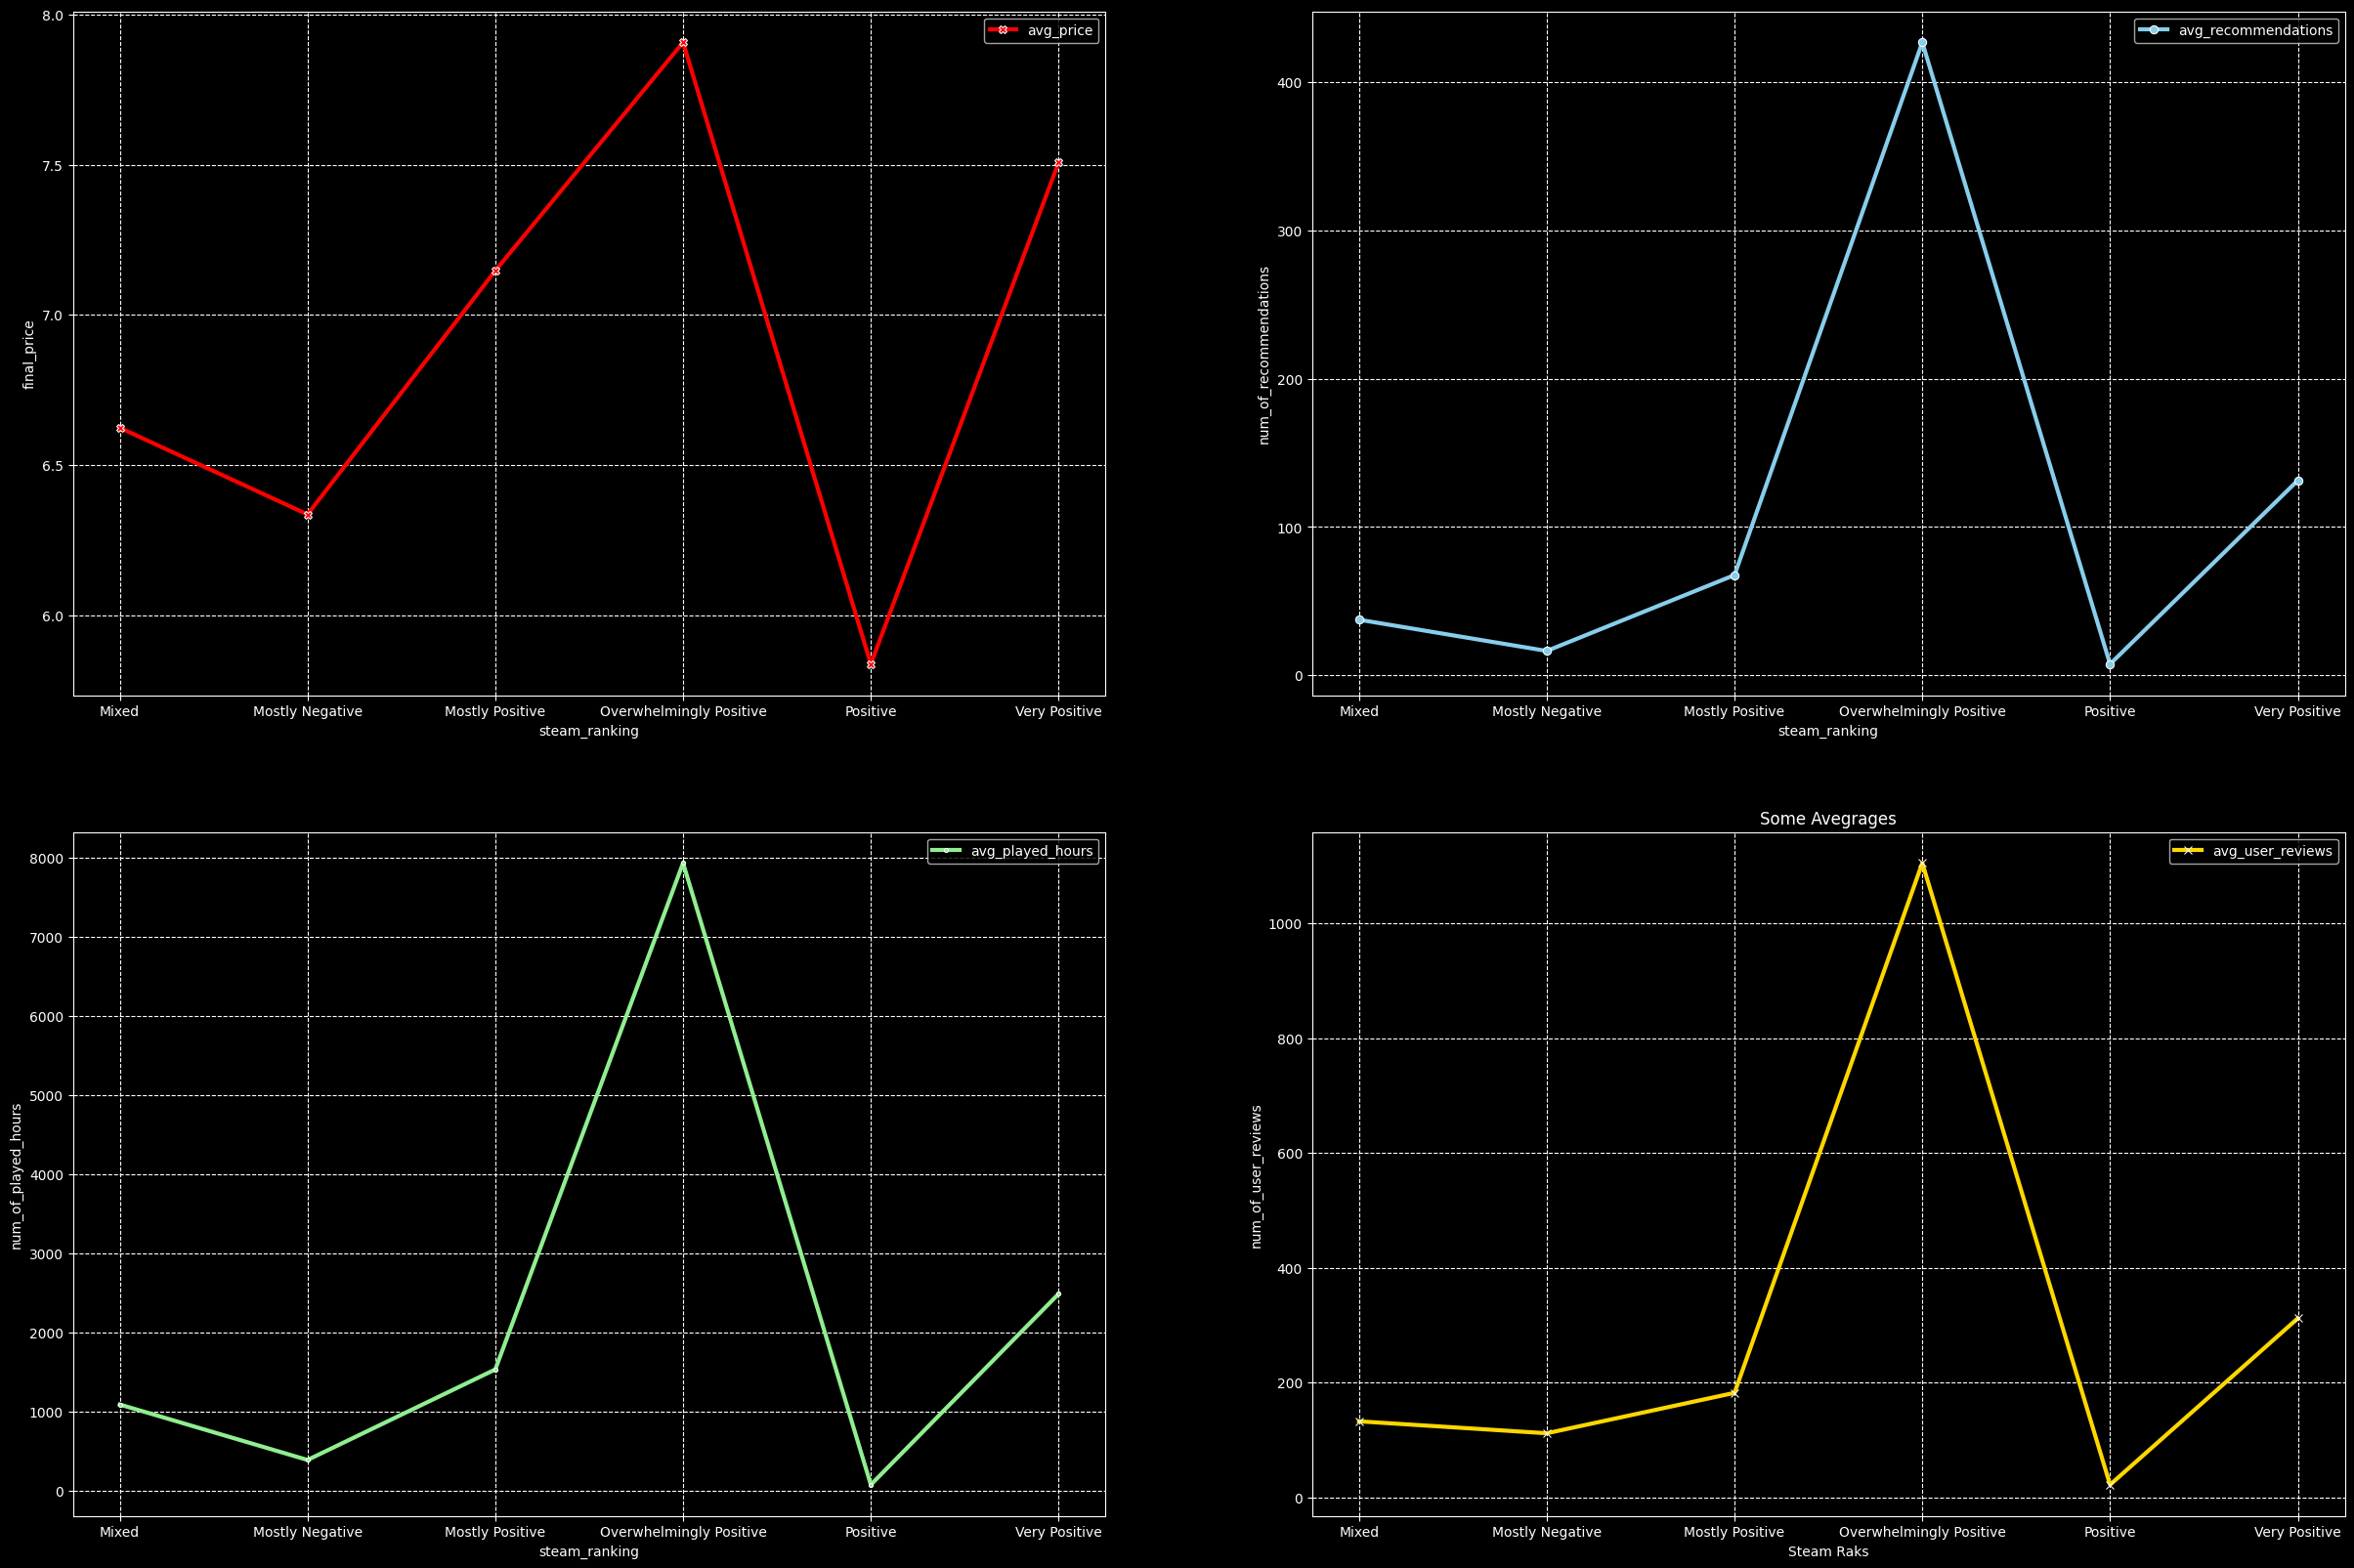

In [176]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
sns.lineplot(x="steam_ranking" , y="final_price" , data=avg_data , color="red" , label="avg_price" , linewidth=3 , marker="X")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,2)
sns.lineplot(x="steam_ranking" , y="num_of_recommendations" , data=avg_data , color="skyblue" , label="avg_recommendations" , linewidth=3 , marker="o")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,3)
sns.lineplot(x="steam_ranking" , y="num_of_played_hours" , data=avg_data , color="lightgreen" , label="avg_played_hours" , linewidth=3 , marker=".")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,4)
sns.lineplot(x="steam_ranking" , y="num_of_user_reviews" , data=avg_data , color="gold" , label="avg_user_reviews" , linewidth=3 , marker="x")
plt.grid(linestyle="--")
plt.legend()


plt.title("Some Avegrages")
plt.xlabel("Steam Raks")

plt.show()

In [177]:
# -----------------------------------------------------------------------------------------------------------------------------------

In [178]:
yd = data.groupby(data["release_date"].dt.year)[["app_id" , "final_price" ,"num_of_played_hours" , "num_of_user_reviews"]].aggregate({"app_id" : "count" , 
                                                                                                                               "final_price" : "mean" , 
                                                                                                                               "num_of_played_hours" : "mean" , 
                                                                                                                               "num_of_user_reviews" : "mean" })

In [179]:
yd

app_id  final_price  num_of_played_hours  num_of_user_reviews
release_date                                                               
2010             202     7.307079          3034.976238           286.138614
2011             277     7.288267          2424.008303           276.364621
2012             424     8.142571          2540.341509           268.101415
2013             578     7.746522          2668.459862           275.044983
2014            1409     7.438581          2305.964869           255.618169
2015            2287     6.832379          1702.153520           211.459554
2016            3383     6.443976          1327.078894           183.595625
2017            4026     6.248621          1300.333681           149.272231
2018            4381     6.132529          1184.181511           134.369779
2019            3979     6.622425          1385.959613           160.658206
2020            4854     6.589965          1126.680511           146.576020
2021            5315     6.689881          1109.131345           145.137347
2022            5655     7.071616           894.509355           131.757206
2023            2441     7.029095           116.204588           117.604670

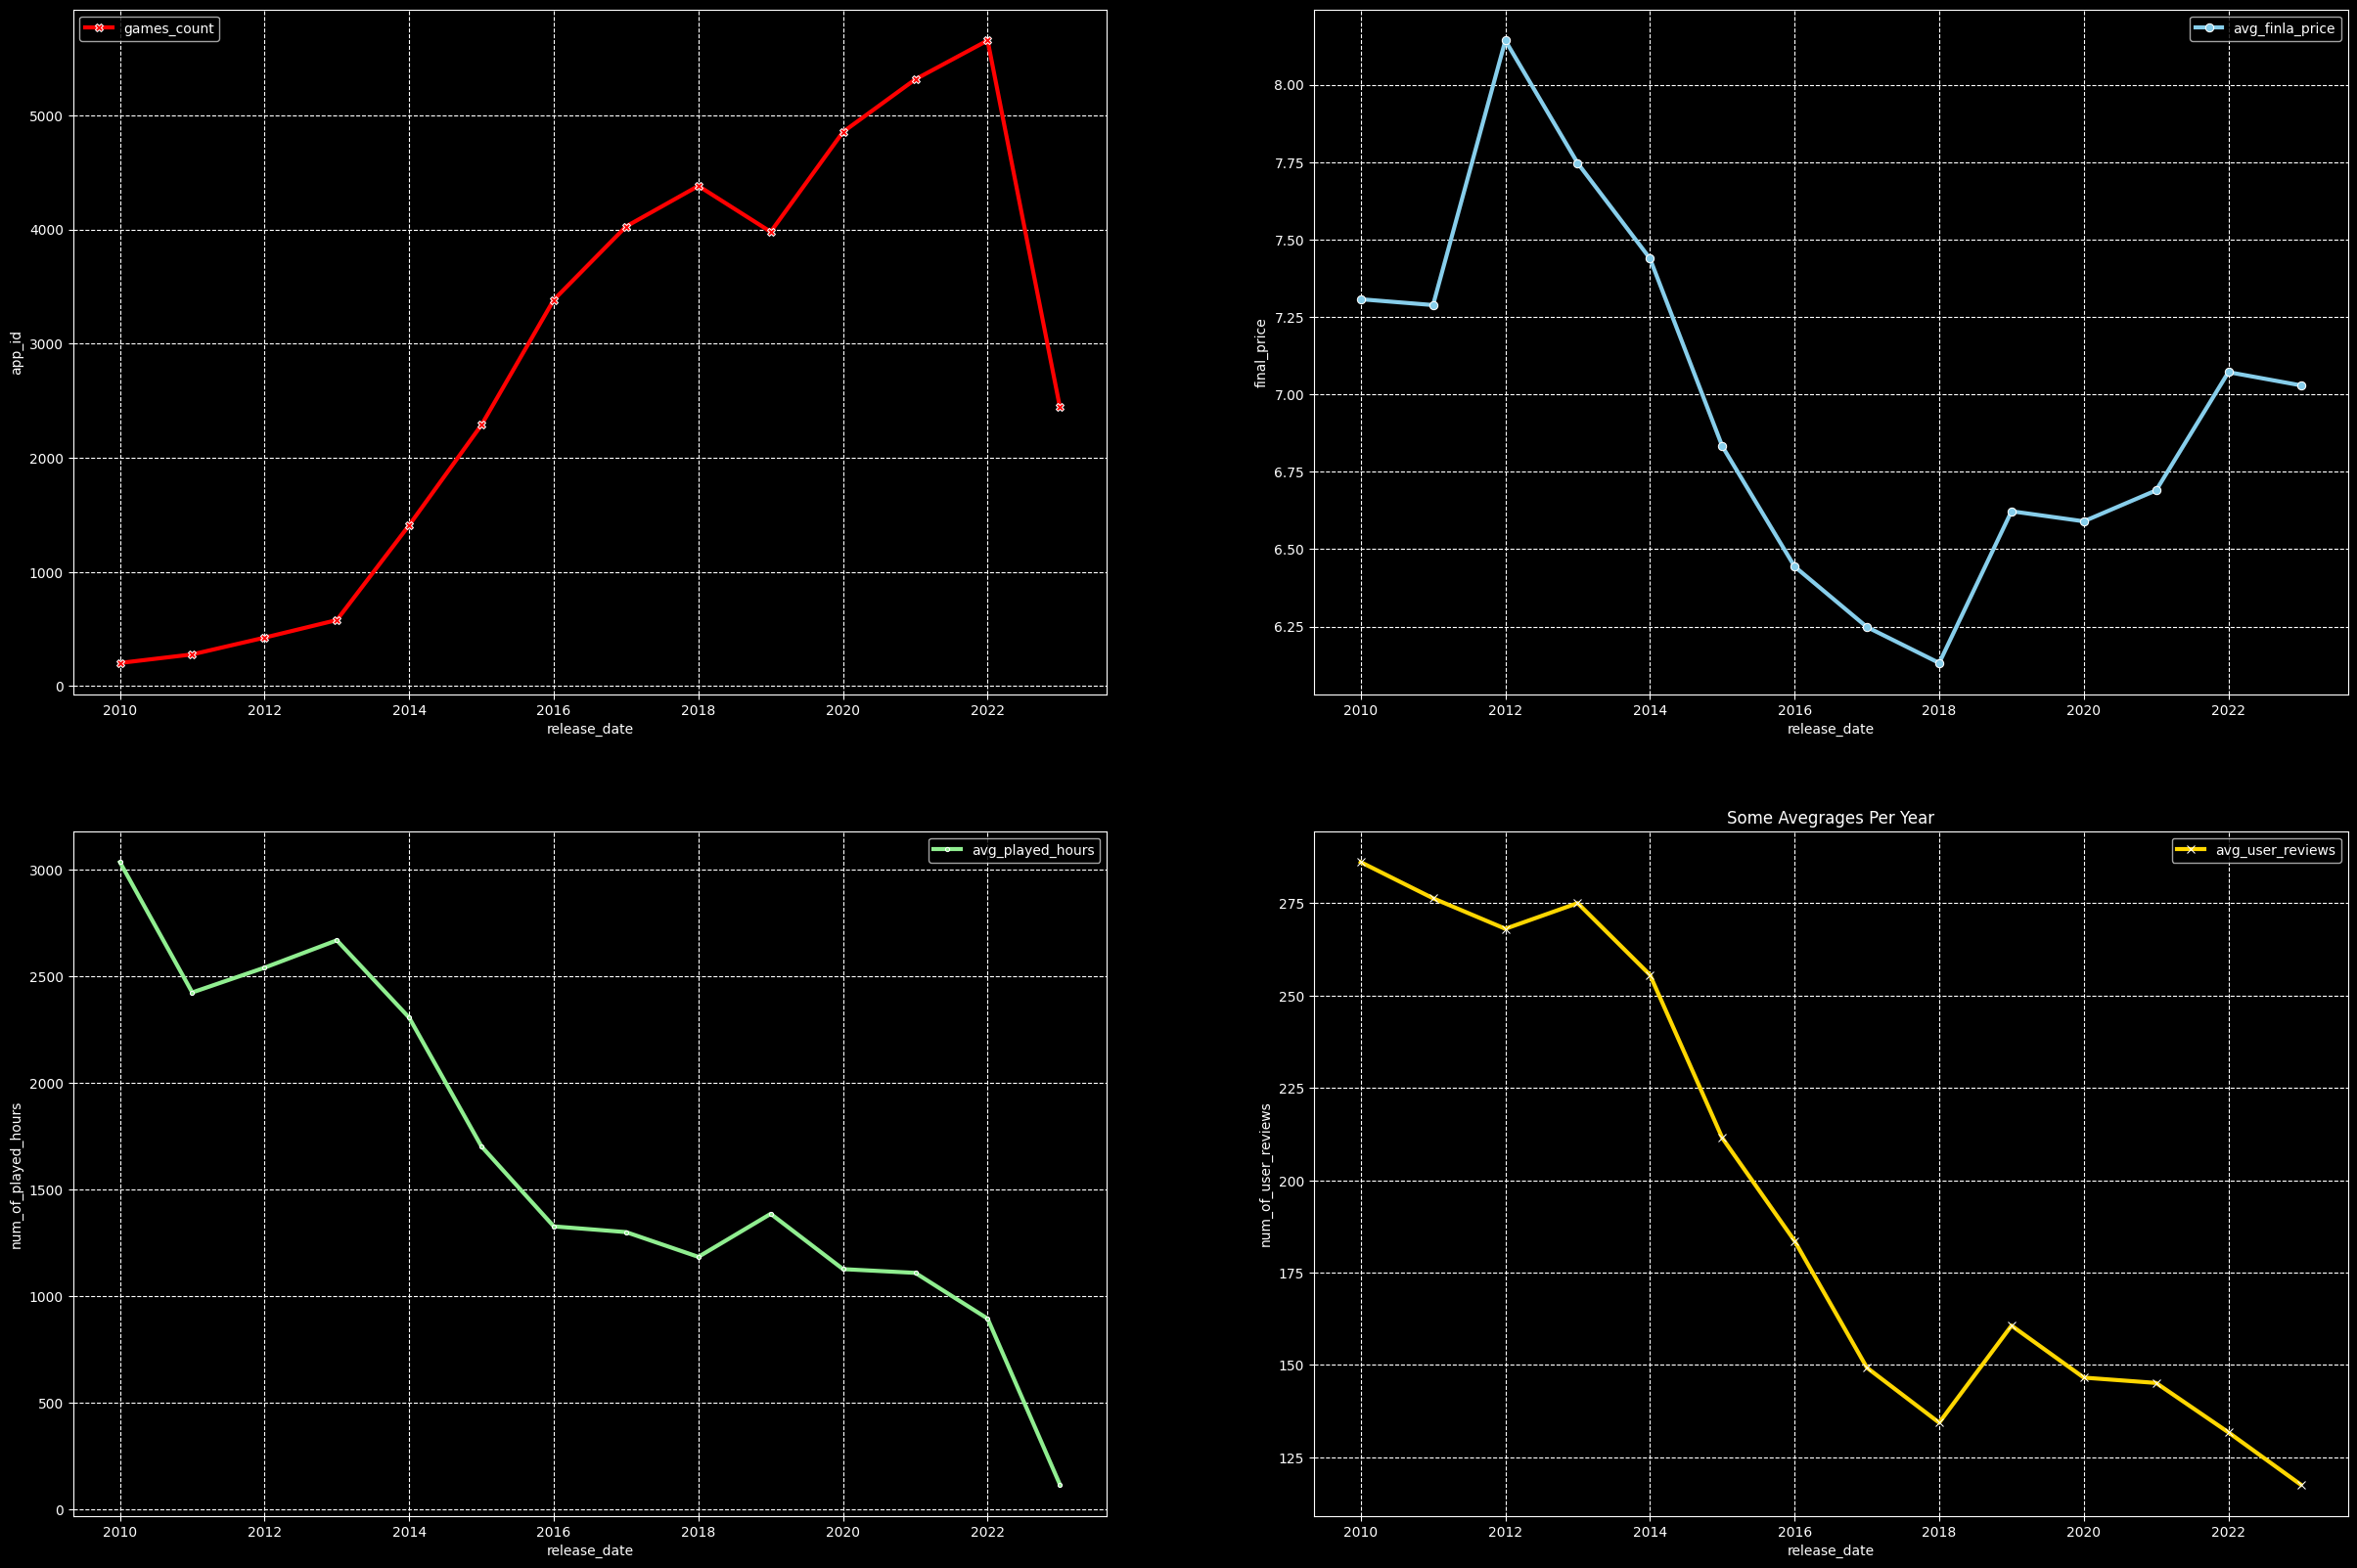

In [180]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
sns.lineplot(x="release_date" , y="app_id" , data=yd , color="red" , label="games_count" , linewidth=3 , marker="X")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,2)
sns.lineplot(x="release_date" , y="final_price" , data=yd , color="skyblue" , label="avg_finla_price" , linewidth=3 , marker="o")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,3)
sns.lineplot(x="release_date" , y="num_of_played_hours" , data=yd , color="lightgreen" , label="avg_played_hours" , linewidth=3 , marker=".")
plt.grid(linestyle="--")
plt.legend()


plt.subplot(2,2,4)
sns.lineplot(x="release_date" , y="num_of_user_reviews" , data=yd , color="gold" , label="avg_user_reviews" , linewidth=3 , marker="x")
plt.grid(linestyle="--")
plt.legend()


plt.title("Some Avegrages Per Year")

plt.show()

In [181]:
# ----------------------------------------------------------------------------------------------------------------------------

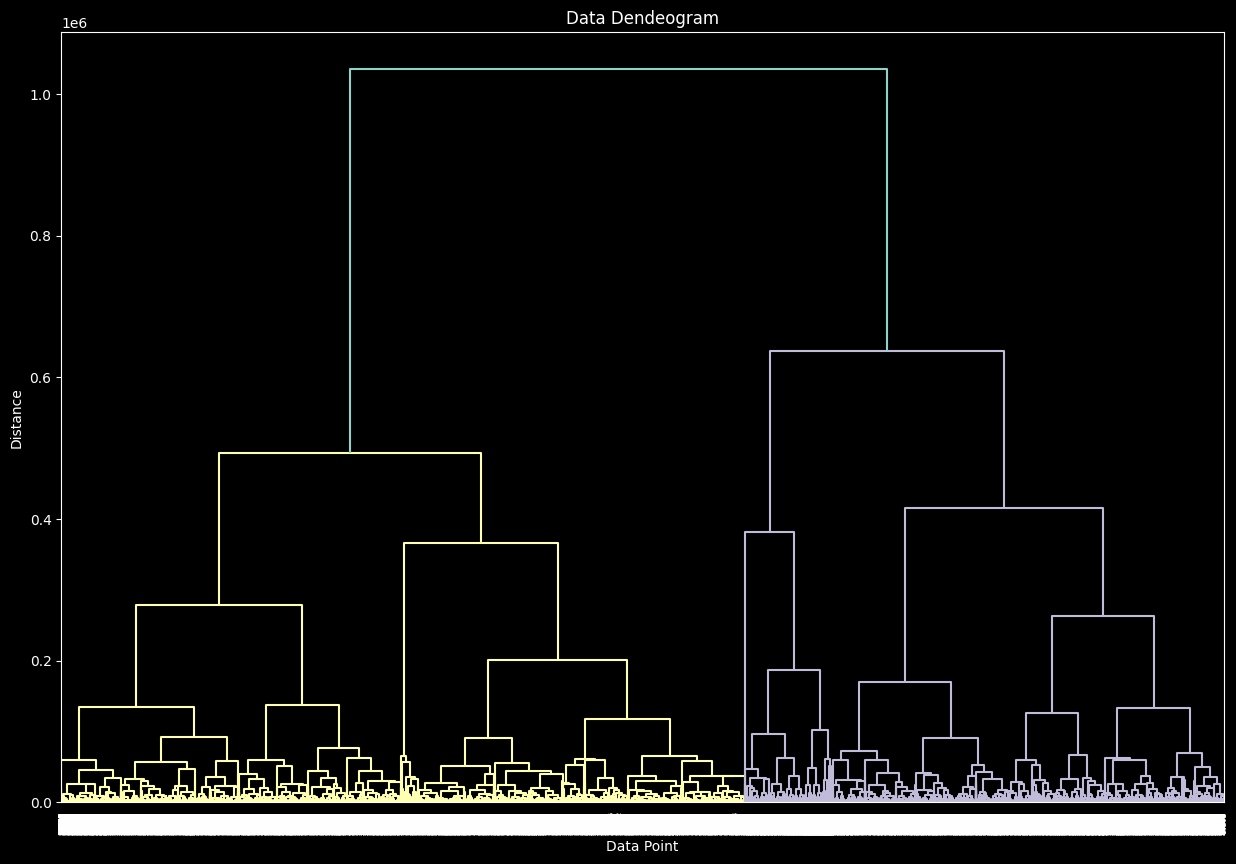

In [182]:
from scipy.cluster.hierarchy import dendrogram , linkage
plt.figure( figsize=(15,10) )

link = linkage(data.select_dtypes(exclude=["bool" , "object" , "datetime64[ns]"]) , method = "average")
dendrogram(link)
data.select_dtypes(exclude=["bool" , "object" , "datetime64[ns]"])
plt.title("Data Dendeogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")

plt.show()

In [183]:
# ----------------------------------------------------------------------------------------------------------------------------

In [184]:
# data.to_csv("steam_games_extracted_phase_3.csv" ,index=False)